# Breast cancer wisconsin (diagnostic) dataset

There are two classes in the dataset:
> - malignant (212 instances, class value 0) and <br>
> - benign (357 instances, class value 1). 

The growth rate of benign tumors is typically slow, and they don't have the ability to spread. On the other hand, malignant tumors tend to grow quickly, invade and damage surrounding healthy tissues, and can spread to other parts of the body. Therefore, developing an accurate classification model that can differentiate between benign and malignant tumors is crucial in ensuring that patients receive the appropriate treatment and care.

In binary classification problems, one class is usually considered as the positive class and the other as the negative class. The choice of positive and negative class labels depends on the problem and the goals of the analysis. Since, it is critical to correctly identify the malignant tumor, I will swap the labels so that we focus on correctly identifying malignant cases.  

In [1]:
import warnings
import numpy as np
warnings.simplefilter('ignore')

from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer(as_frame=True)

In [2]:
X=breast_cancer_data.data
X.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In binary classification problems, the positive and negative class labels are chosen based on the problem and analysis goals. Since correctly identifying malignant tumors is critical in this case, I will switch the labels during performance measurement to focus on correctly identifying malignant cases. 

Currently, the positive class is benign and labeled as 1, and the negative class is malignant and labeled as 0. To avoid confusion during performance measurement using the confusion matrix, I will swap these values so that malignant is labeled as 1 and benign is labeled as 0.

In [3]:
# Swapping the label for malignant and benign such that Malignant is labelled as 1 (positive class) and benign as 0 (Negative class)
y=np.where(breast_cancer_data.target  == 0, 1, 0)

## Visualization of dataset

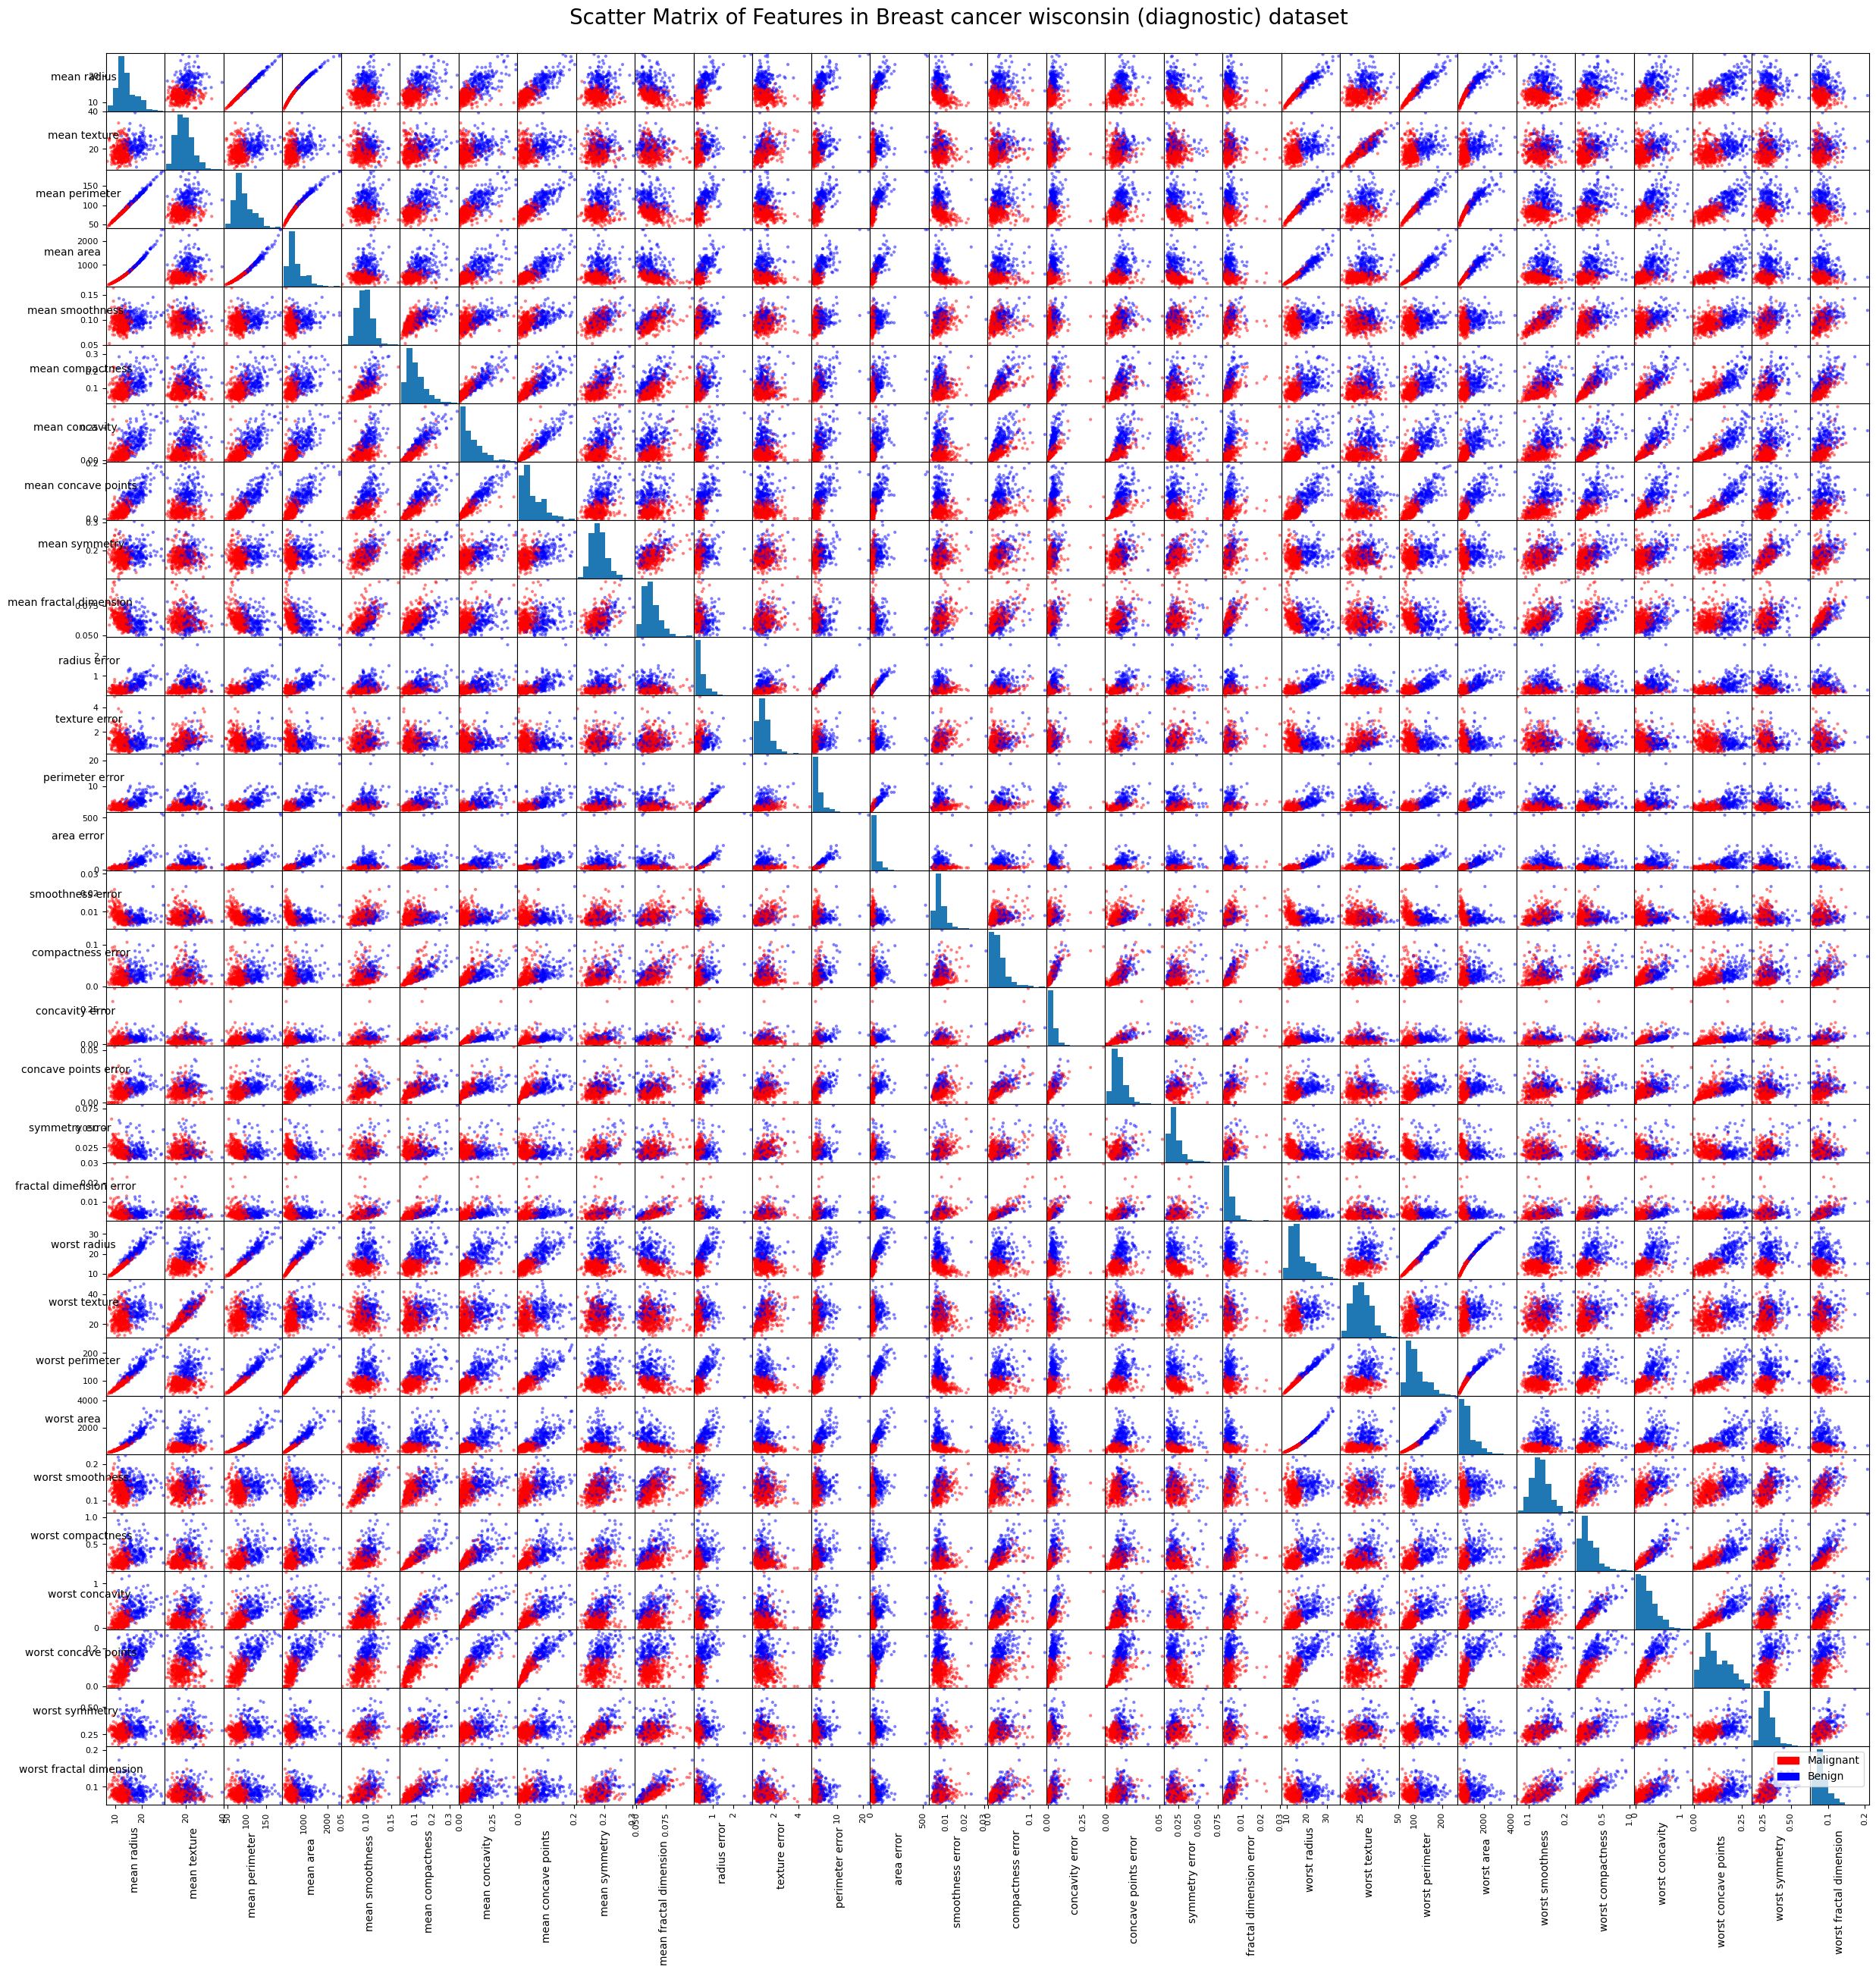

In [4]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define colors for malignant and benign data points
# Red - Malignant
# Blue - Benign
colors = ['red' if label == 0 else 'blue' for label in y]

scatter_matrix_plot = scatter_matrix(X, figsize=(30, 30), diagonal='hist', color=colors)

# Create empty scatter plots with the same colors as our actual data points
red_patch = mpatches.Patch(color='red', label='Malignant')
blue_patch = mpatches.Patch(color='blue', label='Benign')

for i, axs in enumerate(scatter_matrix_plot):
    for j, ax in enumerate(axs):
        if i == len(scatter_matrix_plot) - 1:
            ax.set_xlabel(X.columns[j], rotation=90)
        if j == 0:
            ax.set_ylabel(X.columns[i], rotation=0)          

for ax in scatter_matrix_plot.ravel():
    ax.tick_params(axis='x', labelrotation = 90)
    ax.tick_params(axis='y', labelrotation = 0)
    
# Add legend
plt.legend(handles=[red_patch, blue_patch], loc='best')

plt.suptitle('Scatter Matrix of Features in Breast cancer wisconsin (diagnostic) dataset', fontsize=20, y=0.9)      
plt.show()

The above scatterplot illustrates the relationship between each feature in the dataset. The points in `red` represent the `malignant` data instances, while the `blue` points represent `benign` data instances. There are some features that appear to be correlated with each other. To further investigate the collinearity among features, we can plot a correlation matrix heatmap. Based on the results, we can then remove features that are strongly correlated with each other.

#### Finding Correlation among features

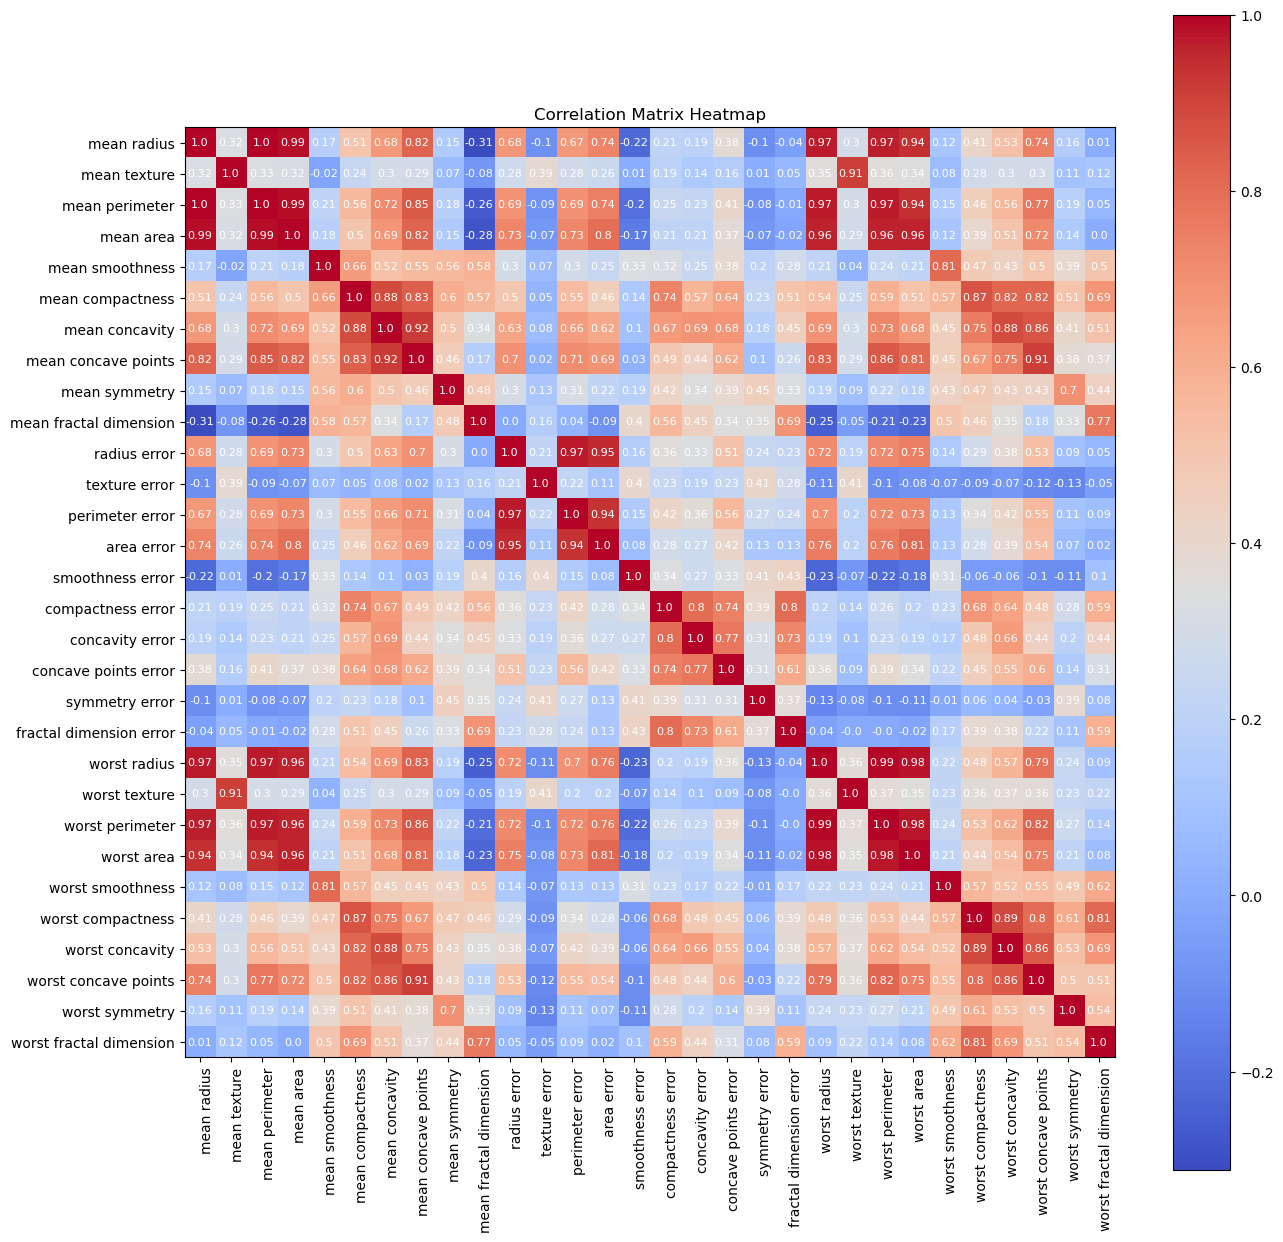

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# calculate the correlation matrix
corr_matrix = X.corr()

# create the heatmap plot
fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(corr_matrix, cmap='coolwarm')

# add a colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# set the axis labels
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, fontsize=10)
ax.set_yticklabels(corr_matrix.columns, fontsize=10)

# rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

# add the correlation coefficients in each cell of the heatmap
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = ax.text(j, i, round(corr_matrix.iloc[i, j], 2), ha="center", va="center", color="w", fontsize=8)

# set the title
ax.set_title("Correlation Matrix Heatmap")

# show the plot
plt.show()

#### Dropping highly correlated features

From the analysis of the scatter matrix plot and correlation matrix, it is evident that some features exhibit high correlation with other features. In order to avoid redundancy and improve the performance of the model, we will drop the highly correlated features and retain only those that are independent. The following features are highly correlated:

1. MEAN RADIUS:
   - mean perimeter
   - mean area
   - worst radius
   - worst perimeter
   - worst area

2. MEAN TEXTURE:
   - worst texture

3. MEAN COMPACTNESS:
   - worst compactness                   
   - mean concavity
                                       
4. MEAN SMOOTHNESS

5. MEAN CONCAVE POINTS:
   - worst concae points
   - mean concavity
                    
6. MEAN SYMMETRY

7. MEAN FRACTAL DIMENSION

8. RADIUS ERROR:
   - perimeter error
   - area error
             
9. TEXTURE ERROR

10. SMOOTHNESS ERROR

11. COMPACTNESS ERROR

12. CONCAVITY ERROR

13. CONCAVE POINTS ERROR

14. SYMMETRY ERROR

15. FRACTAL DIMENSION ERROR

Therefore, we will remove the correlated columns and only retain the independent features for the model.

In [6]:
X = X[['mean radius', 'mean texture', 'mean compactness', 'mean smoothness', 'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'smoothness error', 'concavity error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error']]

Performing stratified sampling to split the data into training and test sets, ensuring that the proportion of target labels is maintained in both sets. This will ensure that our training and test sets are representative of the entire dataset.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123, stratify=y)

## Training and Visualizing Decision Trees

### Decision Tree with default hyperparameters

In [8]:
from sklearn.tree import DecisionTreeClassifier
tree_clf_1 = DecisionTreeClassifier(random_state=8) 
tree_clf_1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=8)

In [9]:
from sklearn.tree import export_graphviz
from graphviz import Source

export_graphviz(
    tree_clf_1,
    out_file='tree_clf_1.dot',
    feature_names=X.columns,
    class_names=breast_cancer_data.target_names,
    filled=True,
    rounded=True,
    
)

src = Source.from_file('tree_clf_1.dot')
# This will save the file and render the tree in a new window 
src.render('tree_clf_1', format='png', cleanup=True, view=True) 

'tree_clf_1.png'

#### NOTE: The cell [9] will render the tree on a new window. This is needed to analyze the complexity of tree. Some of the cells below does the same. 

The decision tree's default configuration, with no regularization or hyperparameters, has a depth of 7 despite the dataset's small size. This deep tree structure could potentially cause overfitting, which we will confirm in the following analysis. In general, a decision tree that is balanced and has a moderate depth is a good sign that the model is not overfitting or underfitting the training data

#### Predictions and Accuracy of Decision Tree with default hyperparameters

In [10]:
y_train_pred = tree_clf_1.predict(X_train)
y_test_pred = tree_clf_1.predict(X_test)

In [11]:
def printAccuracyScore(tree_clf, title, X_train, y_train, X_test, y_test):
    print(f'Accuracy for Training Data ({title}): {round(tree_clf.score(X_train, y_train), 3)}')
    print(f'Accuracy for Test Data ({title}): {round(tree_clf.score(X_test, y_test), 3)}')

In [12]:
printAccuracyScore(tree_clf_1, "Default Decision Tree", X_train, y_train, X_test, y_test)

Accuracy for Training Data (Default Decision Tree): 1.0
Accuracy for Test Data (Default Decision Tree): 0.942


The model has achieved a perfect accuracy score of 1 on the training dataset, indicating that it made accurate predictions for all instances in the training set. However, on the test dataset, the model achieved an accuracy score of 0.942, indicating that it correctly classified 94.2% of the test data. This discrepancy suggests that the model is overfitting to the training data, and it may not generalize well to unseen data. To better understand the difference between the model's predictions on the training and test datasets, I will create a visualization using the `mean radius` and `mean texture` features.

In [13]:
def plotMisclassifiedPoints(X_train, y_train, X_test, y_test, title):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    fig.suptitle(title)

    # Plot for predicted target values - Training Data
    predicted_plot = axes[0].scatter(X_train['mean radius'], X_train['mean texture'], c=y_train_pred, cmap='coolwarm_r')
    axes[0].set_xlabel('mean radius')
    axes[0].set_ylabel('mean texture')
    axes[0].set_title('Predicted Target Values - Training Data')

    misclassified = np.where(y_train != y_train_pred)[0]
    axes[0].scatter(X_train.iloc[misclassified]['mean radius'], X_train.iloc[misclassified]['mean texture'], 
                    marker='x', s=100, linewidth=2, c='black', label='Misclassified')

    # Plot for predicted target values - Test Data
    axes[1].scatter(X_test['mean radius'], X_test['mean texture'], c=y_test_pred, cmap='coolwarm_r')
    axes[1].set_xlabel('mean radius')
    axes[1].set_ylabel('mean texture')
    axes[1].set_title('Predicted Target Values - Test Data')

    # Highlight mispredicted data points with a different color
    misclassified = np.where(y_test != y_test_pred)[0]
    axes[1].scatter(X_test.iloc[misclassified]['mean radius'], X_test.iloc[misclassified]['mean texture'], 
                    marker='x', s=100, linewidth=2, c='black', label='Misclassified')
    plt.legend()
    plt.show()

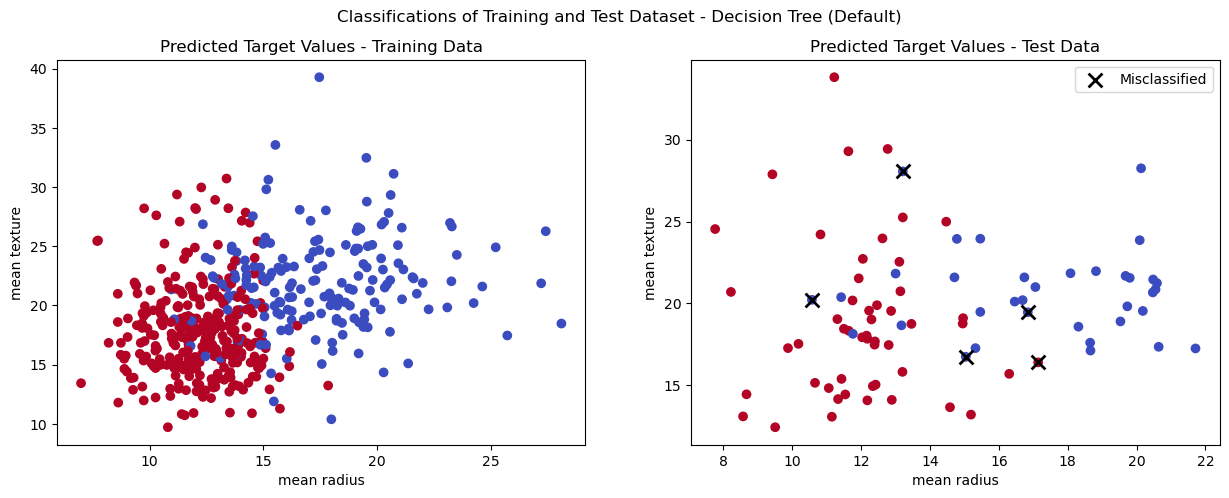

In [14]:
plotMisclassifiedPoints(X_train, y_train, X_test, y_test, "Classifications of Training and Test Dataset - Decision Tree (Default)")

The left scatter plot indicates that the model has overfitted the training data and successfully classified all the training data points. However, the right scatter plot, which shows the test data, indicates that the model has made some incorrect classifications. These misclassifications include benign tumors being classified as malignant and malignant tumors being classified as benign. Since misclassifying cancer can have significant impacts on patient treatment and hence survival, our model needs to have high precision and recall. 

#### Precision and Recall for Decison Tree with Default Hyperparameters

In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def drawConfusionMatrix(y_train, y_train_pred, y_test, y_test_pred, title):
# Define the class labels
    classes = ['benign', 'malignant']

    conf_matrix_train = confusion_matrix(y_train, y_train_pred)
    conf_matrix_test = confusion_matrix(y_test, y_test_pred)

    # Create the figure and axes objects
    fig, axs = plt.subplots(ncols=2, figsize=(15, 3))

    # Create the heatmap using matshow
    axs[0].matshow(conf_matrix_train, cmap=plt.cm.Blues)

    # Add colorbar to the heatmap
    # cbar = plt.colorbar(heatmap)

    # Set the ticks and labels for x and y axes
    axs[0].set_xticks(np.arange(len(classes)))
    axs[0].set_xticklabels(classes)
    axs[0].set_yticks(np.arange(len(classes)))
    axs[0].set_yticklabels(classes)

    # Add the count values to each cell
    for i in range(len(classes)):
        for j in range(len(classes)):
            text = axs[0].text(j, i, conf_matrix_train[i, j],
                           ha="center", va="center", color="orange")

    # Set the title and axis labels
    axs[0].set_title(f'{title} - Training Data')
    axs[0].set_xlabel('Predicted Class')
    axs[0].set_ylabel('True Class')
    
    axs[1].matshow(conf_matrix_test, cmap=plt.cm.Blues)

    # Add colorbar to the heatmap
    # cbar = plt.colorbar(heatmap)

    # Set the ticks and labels for x and y axes
    axs[1].set_xticks(np.arange(len(classes)))
    axs[1].set_xticklabels(classes)
    axs[1].set_yticks(np.arange(len(classes)))
    axs[1].set_yticklabels(classes)

    # Add the count values to each cell
    for i in range(len(classes)):
        for j in range(len(classes)):
            text = axs[1].text(j, i, conf_matrix_test[i, j],
                           ha="center", va="center", color="orange")

    # Set the title and axis labels
    axs[1].set_title(f'{title} - Testing Data')
    axs[1].set_xlabel('Predicted Class')
    axs[1].set_ylabel('True Class')

    # Show the plot
    plt.show()

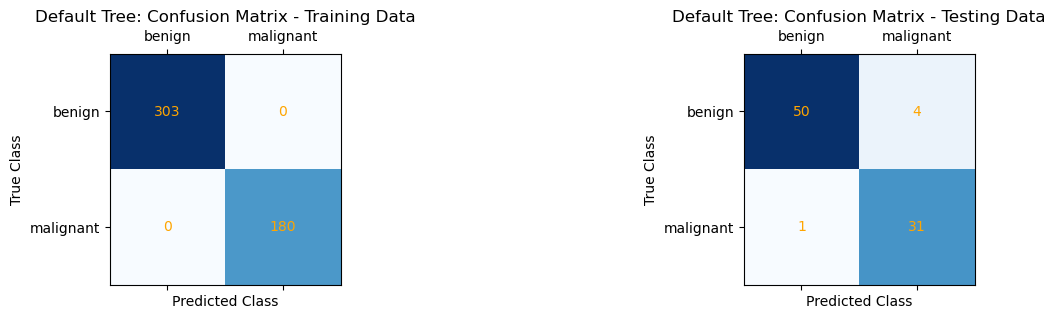

In [16]:
drawConfusionMatrix(y_train, y_train_pred, y_test, y_test_pred, 'Default Tree: Confusion Matrix')

Based on the confusion matrix above, it is evident that the model accurately predicted all instances in the training set. However, it incorrectly classified 1 malignant tumor as benign and 4 benign tumors as malignant out of the total 86 test data points. These results suggest that the model has overfit to the training set and may not perform well on new, unseen data.

In [17]:
from sklearn.metrics import precision_score, recall_score

def printPerformanceMetrics(y_train, y_train_pred, y_test, y_test_pred, tree_type):
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)    

    print(f"Precision - {tree_type} (Training Dataset): {round( precision_train, 3)}")
    print(f"Recall - {tree_type} (Training Dataset): { round( recall_train, 3) }")    
    print('\n')    
    print(f"Precision - {tree_type} (Test Dataset): {round( precision_test, 3)}")
    print(f"Recall - {tree_type} (Test Dataset): { round( recall_test, 3)}")

In [18]:
printPerformanceMetrics(y_train, y_train_pred, y_test, y_test_pred, "Default Tree")

Precision - Default Tree (Training Dataset): 1.0
Recall - Default Tree (Training Dataset): 1.0


Precision - Default Tree (Test Dataset): 0.886
Recall - Default Tree (Test Dataset): 0.969


> POSITIVE CLASS -> MALIGNANT <br>
> NEGATIVE CLASS -> BENIGN

The model's precision score for the test data is 0.886, which indicates that out of all the samples classified as positive (MALIGNANT), only 88.6% of them were actually positive. On the other hand, the recall score of 0.969 indicates that out of all the positive samples, the model correctly identified 96.9% of them. However, both precision and recall scores were 1 for the training set, which suggests that the model is overfitting to the training data.

#### Summary of Performance Metrics for Default Decision Tree Classifier

|                          | Default Decision Tree Classifier |
|--------------------------|----------------------|
| Score (Training Data)     | 1.0                  |
| Score (Test Data)         | 0.941                |
| Precision (Test Data)                 | 0.886                |
| Recall  (Test Data)                  | 0.969                |

### Decison Tree Classifier with max_depth of 3

In [19]:
tree_clf_2 = DecisionTreeClassifier(random_state=8, max_depth=3) 
tree_clf_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=8)

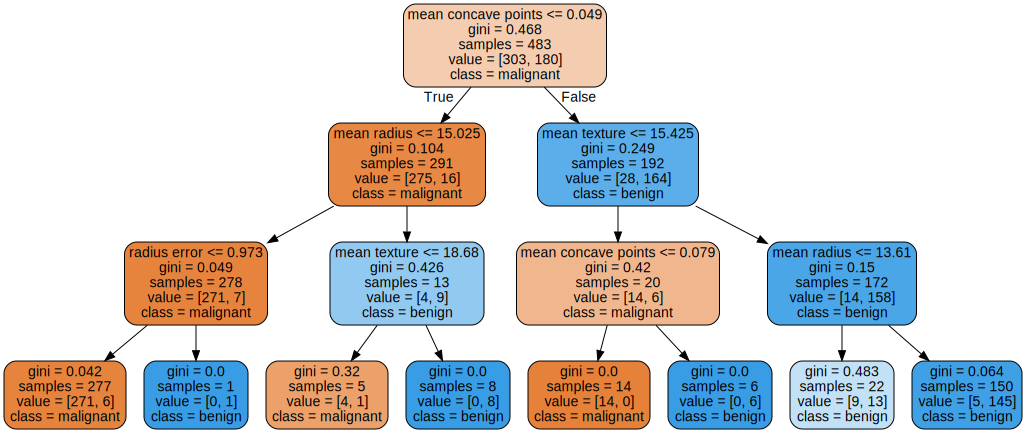

In [20]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf_2,
    out_file='tree_clf_2.dot',
    feature_names=X.columns,
    class_names=breast_cancer_data.target_names,
    filled=True,
    rounded=True
)

from graphviz import Source

Source.from_file('tree_clf_2.dot')

As shown in the diagram above, we constructed a decision tree with a depth of 3. 

To classify a new tumor cell, the model first start at the root node (depth=0) and check if the value of `mean concave points` of the tumor cell is `<=` to 0.049. If it is less than 0.049, the model move to the left node of the root (depth=1) and then check whether the `mean radius` of the cell is less than or equal to 15.025. If it is, it again moves to the left node and check whether the value of `radius error` is less than or equal to 0.973. If it is, the model classify the cell as malignant. Otherwise, it classify the cell as benign.



#### Predictions and Accuracy of Decision Tree with max depth of 3

In [21]:
y_train_pred = tree_clf_2.predict(X_train)
y_test_pred = tree_clf_2.predict(X_test)

In [22]:
printAccuracyScore(tree_clf_2, "Decision Tree - max_depth=3", X_train, y_train, X_test, y_test)

Accuracy for Training Data (Decision Tree - max_depth=3): 0.957
Accuracy for Test Data (Decision Tree - max_depth=3): 0.942




Upon adding a `max depth` of 3 to the decision tree, we observe that the model no longer overfits to the training data, while maintaining respectable levels of accuracy as follows:
- Accuracy for training data (Max depth=3) : 0.957
- Accuracy for test data (Max depth=3) : 0.942

The model has shown an accuracy of 0.957 on the training dataset which means the model has classified 95.7% of the training set correctly. At least the model has not overfitted in this case. The accuracy is 0.942 on the test dataset which means it has it has  94.2% of test data correctly. Therefore, we can conclude that the updated model has better generalization performance compared to the default tree.


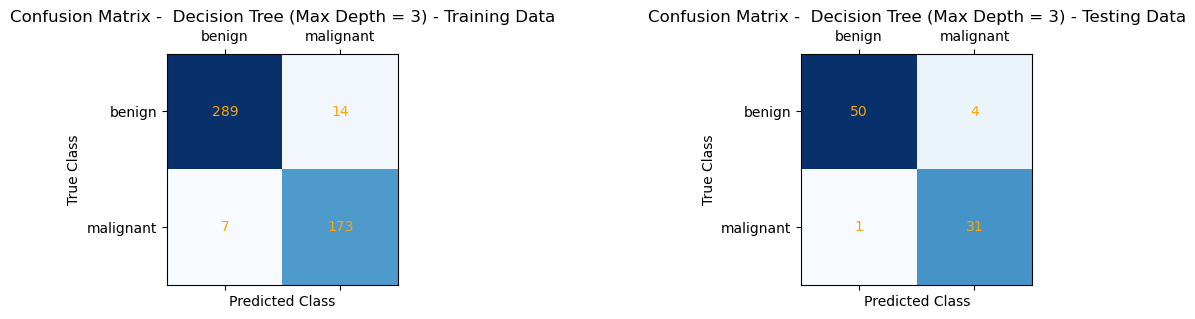

In [23]:
drawConfusionMatrix(y_train, y_train_pred, y_test, y_test_pred, "Confusion Matrix -  Decision Tree (Max Depth = 3)")

#### Precision and Recall of Decision Tree with max depth of 3

In [24]:
printPerformanceMetrics(y_train, y_train_pred, y_test, y_test_pred, "Decision Tree (Max Depth = 3)")

Precision - Decision Tree (Max Depth = 3) (Training Dataset): 0.925
Recall - Decision Tree (Max Depth = 3) (Training Dataset): 0.961


Precision - Decision Tree (Max Depth = 3) (Test Dataset): 0.886
Recall - Decision Tree (Max Depth = 3) (Test Dataset): 0.969


#### Comparison of Performance Metrics for Decision Tree Classifier (max_depth=3) and Decision Tree Classifier (Default)



|                          | Default Decision Tree Classifier | Decision Tree Classifier(max_depth=3)|
|--------------------------|----------------------|  ------------------------------------------------|
| Score (Training Data)     | 1.0                  | 0.957 |
| Score (Test Data)         | 0.941                | 0.942 |
| Precision (Test Data)                | 0.886                |0.886 |
| Recall (Test Data)                   | 0.969                |0.969 |

We can observe same precision and recall for the Decision Tree with `max_depth=3` as well when compared to Default Decision Tree with no regularization. So, we are able to achieve same level of accuracy, precision and recall with simple model. 

### Decision Tree Classifier with min_samples_split = 5

In [25]:
tree_clf_3 = DecisionTreeClassifier(random_state=8, min_samples_split=5)
tree_clf_3.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=5, random_state=8)

In [26]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf_3,
    out_file='tree_clf_3.dot',
    feature_names=X.columns,
    class_names=breast_cancer_data.target_names,
    filled=True,
    rounded=True
)

from graphviz import Source
src = Source.from_file('tree_clf_3.dot')
src.render('tree_clf_3', format='png', cleanup=True, view=True) 

'tree_clf_3.png'

#### Predictions and Accuracy of Decision Tree with min_samples_split = 3

In [27]:
y_train_pred = tree_clf_3.predict(X_train)
y_test_pred = tree_clf_3.predict(X_test)

In [28]:
printAccuracyScore(tree_clf_3, "Decision Tree - min_samples_split=5", X_train, y_train, X_test, y_test)

Accuracy for Training Data (Decision Tree - min_samples_split=5): 0.994
Accuracy for Test Data (Decision Tree - min_samples_split=5): 0.919


After using the Decision tree classifier with `min_samples_split = 5` to model the decision tree, we found that the model's accuracy on the training data was significantly higher than the accuracy on the test data, indicating overfitting. This means that the model is performing well on the training data but not on the test data, which is what it was designed to do. 

To further investigate this issue, we studied the decision tree diagram and found that the tree had a depth of 8, which is quite deep and complex. This is another indication of overfitting because a deep and complex tree can memorize the training data and will not generalize well to unseen test data. 

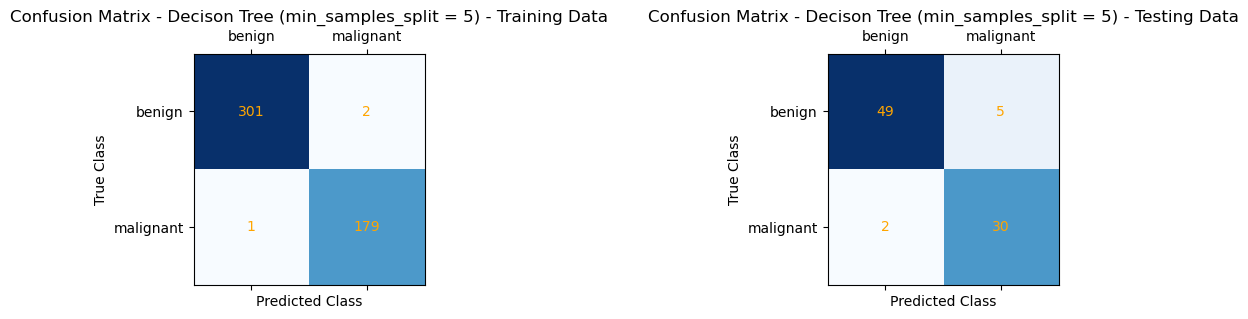

In [29]:
drawConfusionMatrix(y_train, y_train_pred, y_test, y_test_pred, "Confusion Matrix - Decison Tree (min_samples_split = 5)")

#### Precision and Recall for Decison Tree with min_samples_split = 5

In [30]:
printPerformanceMetrics(y_train, y_train_pred, y_test, y_test_pred, "Decision Tree (min_samples_split = 5)")

Precision - Decision Tree (min_samples_split = 5) (Training Dataset): 0.989
Recall - Decision Tree (min_samples_split = 5) (Training Dataset): 0.994


Precision - Decision Tree (min_samples_split = 5) (Test Dataset): 0.857
Recall - Decision Tree (min_samples_split = 5) (Test Dataset): 0.938


The trained decision tree model with `min_samples_split = 5` exhibits overfitting, as indicated by the higher accuracy score on the training data compared to the test data. Moreover, examining the decision tree diagram shows that the tree is very deep and complex, indicating overfitting. Despite its complexity, the model performs poorly on the test data with the lowest recall and precision score compared to the other decision trees trained. This is a clear indication that the model is not able to generalize well to new, unseen data, and its performance is limited to the training data only.

#### Comparison of Decision Tree Classifier (min_samples_split=5) with previous Decision Trees Classifiers

|                     -     | Default Decision Tree Classifier | Decision Tree Classifier(max_depth=3)| Decision Tree Classifier (min_samples_split=5) | 
|-------------------------- |----------------------|  ------------------------------------------------|-----------------------------------------------|
| Score (Training Data)     | 1.0                  | 0.957                                            | 0.994 |
| Score (Test Data)         | 0.941                | 0.942                                     | 0.919 |
| Precision (Test Data)              | 0.886                |0.886 |  0.857 |
| Recall (Test Data)                   | 0.969                |0.969 | 0.938 |

The precision and recall for Decision Tree (`min_samples_split=5`) has decreased compared to Default Decision tree and Decision Tree `(max_depth=3)`. This is clearly not what we wanted. We need model to be have high accuracy, high precision and high recall. 

### Decision Tree Classifier with min_samples_leaf = 5

In [31]:
tree_clf_4 = DecisionTreeClassifier(random_state=8, min_samples_leaf=5)
tree_clf_4.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=5, random_state=8)

In [32]:
export_graphviz(
    tree_clf_4,
    out_file='tree_clf_4.dot',
    feature_names=X.columns,
    class_names=breast_cancer_data.target_names,
    filled=True,
    rounded=True
)

from graphviz import Source
src = Source.from_file('tree_clf_4.dot')
src.render('tree_clf_4', format='png', cleanup=True, view=True) 

'tree_clf_4.png'

#### Predictions and Accuracy of Decision Tree with min_samples_leaf = 5

In [33]:
y_train_pred = tree_clf_4.predict(X_train)
y_test_pred = tree_clf_4.predict(X_test)

In [34]:
printAccuracyScore(tree_clf_4, "Decision Tree - min_samples_leaf=5", X_train, y_train, X_test, y_test)

Accuracy for Training Data (Decision Tree - min_samples_leaf=5): 0.973
Accuracy for Test Data (Decision Tree - min_samples_leaf=5): 0.942


The accuracy for `Decision Tree (min_samples_leaf=5)` is better compared to `Decison Tree (min_samples_split=5)` with 94.2% accuracy for the test data. 

#### Precision and Recall of Decision Tree with min_samples_leaf = 5 

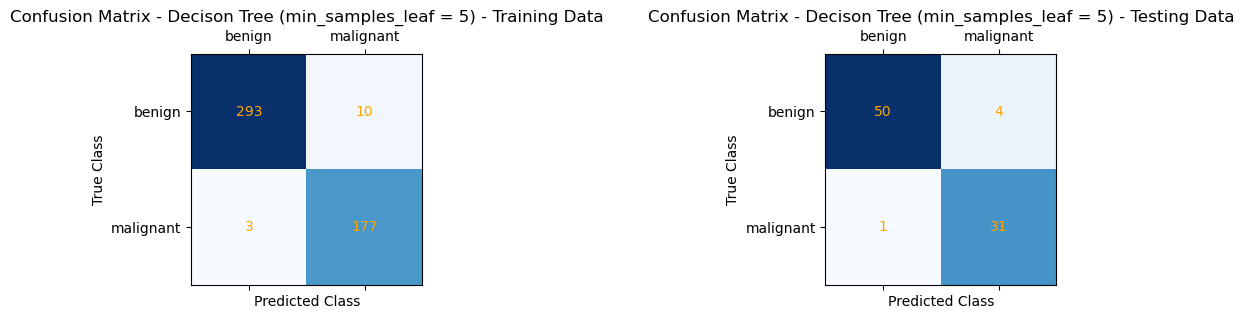

In [35]:
drawConfusionMatrix(y_train, y_train_pred, y_test, y_test_pred, "Confusion Matrix - Decison Tree (min_samples_leaf = 5)")

In [36]:
printPerformanceMetrics(y_train, y_train_pred, y_test, y_test_pred, "Decision Tree (min_samples_leaf = 5)")

Precision - Decision Tree (min_samples_leaf = 5) (Training Dataset): 0.947
Recall - Decision Tree (min_samples_leaf = 5) (Training Dataset): 0.983


Precision - Decision Tree (min_samples_leaf = 5) (Test Dataset): 0.886
Recall - Decision Tree (min_samples_leaf = 5) (Test Dataset): 0.969


#### Comparison of Precision and Recall of Decision Tree Classifier (min_samples_leaf=5) with previous Decision Tree Classifiers

|            | Default Decision Tree Classifier | Decision Tree Classifier(max_depth=3)| Decision Tree Classifier (min_samples_split=5) | Decision Tree Classifier (min_samples_leaf=5)|
|-------------------------- |----------------------|  ------------------------------------------------|-----------------------------------------------| -------- |
| Score (Training Data)     | 1.0                  | 0.957                                            | 0.994 | 0.973 |
| Score (Test Data)         | 0.941                | 0.942                                     | 0.919 | 0.942 |
| Precision (Test Data)              | 0.886                |0.886 |  0.857 | 0.886 |
| Recall (Test Data)                   | 0.969                |0.969 | 0.938 | 0.969 |

The precision and recall are still same as that of `Decison Tree (default)` and `Desicion Tree (max_depth=3)`.

## Finding optimal parameter for Decision Tree Classifier 

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
tree_clf = DecisionTreeClassifier(random_state=8)

# Define the hyperparameters to be tuned and their possible values
parameters = {'max_depth': [2, 3, 4, 5, 6, 7, 8],
              'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
              'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}

# Create a GridSearchCV object with 3-fold cross-validation
clf = GridSearchCV(tree_clf, parameters, cv=3)

# Fit the GridSearchCV object to the training data
clf.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding score
print('Best hyperparameters:', clf.best_params_)
print('Best score:', round(clf.best_score_,2))


Best hyperparameters: {'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 2}
Best score: 0.91


Cross-validation and Grid Search were used to determine the optimal hyperparameters for the Decision Tree Classifier. The best combination of hyperparameters found were `max_depth` of 6, `min_samples_leaf` of 6, and `min_samples_split` of 2. This means that the decision tree should not split a node further when the number of samples in the node is less than 2 and each leaf node should have at least 6 samples. The `min_samples_split` value of 2 is still reasonable as we need high precision and do not want a single malignant sample to be classified as negative. These hyperparameters were chosen after evaluating multiple combinations of hyperparameters to identify the best possible values for our model.

In [38]:
tree_clf_opt = DecisionTreeClassifier(random_state=8, max_depth=6, min_samples_leaf=6, min_samples_split=2)
tree_clf_opt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, random_state=8)

In [39]:
export_graphviz(
    tree_clf_opt,
    out_file='tree_clf_opt.dot',
    feature_names=X.columns,
    class_names=breast_cancer_data.target_names,
    filled=True,
    rounded=True
)
src = Source.from_file('tree_clf_opt.dot')
src.render('tree_clf_opt', format='png', cleanup=True, view=True) 

'tree_clf_opt.png'

#### Predictions and Accuracy of Optimal Decision Tree Classifier

In [40]:
y_train_pred = tree_clf_opt.predict(X_train)
y_test_pred = tree_clf_opt.predict(X_test)

In [41]:
printAccuracyScore(tree_clf_opt, "Optimal Tree ", X_train, y_train, X_test, y_test)

Accuracy for Training Data (Optimal Tree ): 0.969
Accuracy for Test Data (Optimal Tree ): 0.953


The accuracy of the optimal decision tree model on the training data is 0.969 or 96.9%, which means that the model has correctly classified 96.9% of the training data. Similarly, the accuracy of the optimal decision tree model on the test data is 0.953 or 95.3% (best till now), indicating that the model has correctly classified 95.3% of the test data. This shows that the model is performing well on both training and test data and is not overfitting or underfitting. 

To visualize the difference between the model's predictions on the training and test datasets, I will use `mean radius` and `mean texture` as the two features again. The plot below shows that there are some misclassification on both training and test dataset. This shows that the model has not overfitted which confirms our conclusion above. 

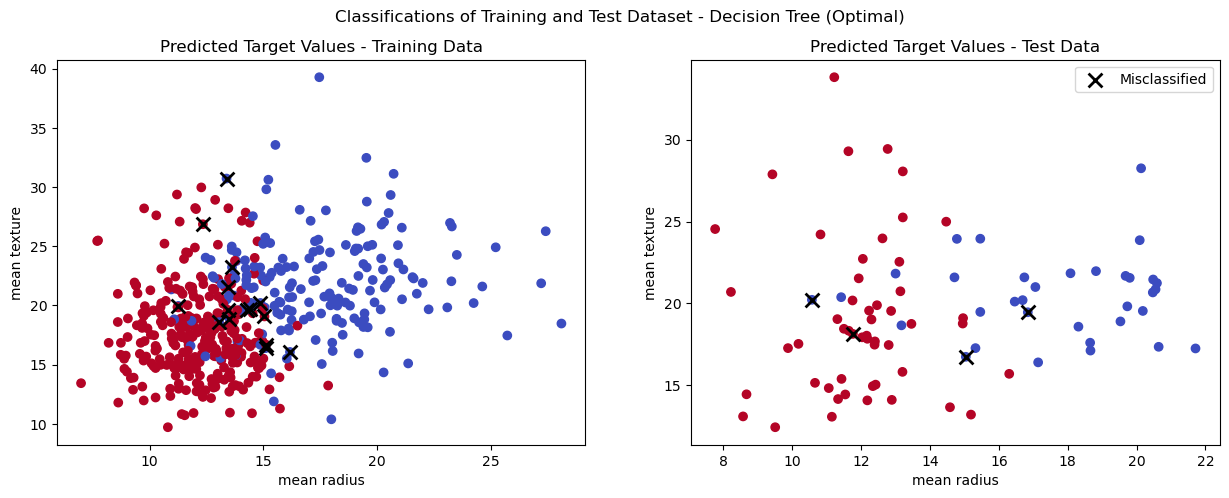

In [42]:
plotMisclassifiedPoints(X_train, y_train, X_test, y_test, "Classifications of Training and Test Dataset - Decision Tree (Optimal)")

#### Precision and Recall for Optimal Decision Tree Classifier

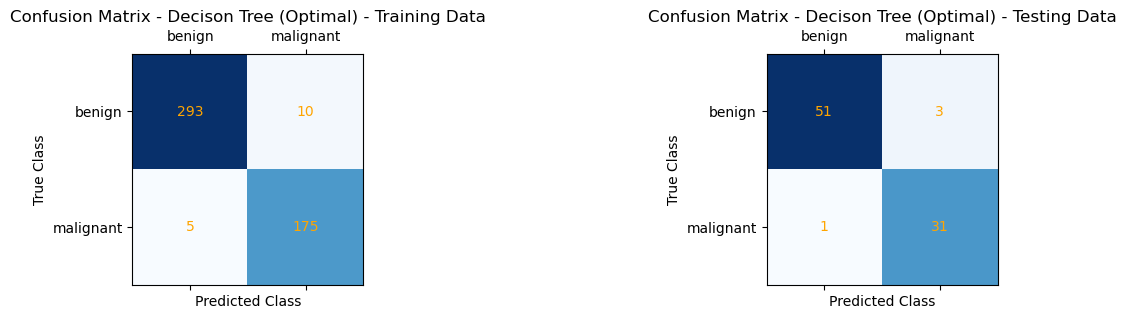

In [43]:
drawConfusionMatrix(y_train, y_train_pred, y_test, y_test_pred, "Confusion Matrix - Decison Tree (Optimal)")

In [44]:
printPerformanceMetrics(y_train, y_train_pred, y_test, y_test_pred, "Decision Tree (Optimal)")

Precision - Decision Tree (Optimal) (Training Dataset): 0.946
Recall - Decision Tree (Optimal) (Training Dataset): 0.972


Precision - Decision Tree (Optimal) (Test Dataset): 0.912
Recall - Decision Tree (Optimal) (Test Dataset): 0.969


The precision and recall scores for the training set are 0.946 and 0.972 respectively, while the precision and recall scores for the test set are 0.912 and 0.969 respectively. Compared to the previous classifiers, this optimal model has improved the accuracy of the test set and has the highest precision and recall score for the test set. This is important for breast cancer diagnosis because we want to minimize the number of false negatives, where a malignant tumor is classified as benign, as this could result in a delayed diagnosis and treatment. 

We can also compare the confusion matrices for the previous classifiers with the optimal model. The previous classifiers, especially the one with a high max_depth and low min_samples_leaf, tend to overfit the training data and have a higher number of false positives and false negatives in the test set. The optimal model, on the other hand, has reduced the number of false positives and false negatives in the test set while maintaining high accuracy and precision. 

In summary, the optimal Decision Tree Classifier with the hyperparameters of max_depth=6, min_samples_leaf=6, and min_samples_split=2 has improved the performance of breast cancer diagnosis compared to the previous classifiers by reducing the number of false positives and false negatives in the test set, while maintaining high accuracy and precision. We can find the summary of accuracy score and precision and recall score for test data on the table below.

#### Comparision of Precison and Recall of Optimal Decision Tree Classifier with previous Trees

|            | Default Decision Tree  | Decision Tree (max_depth=3)| Decision Tree  (min_samples_split=5) | Decision Tree  (min_samples_leaf=5)| Optimal Decision Tree  |
|-------------------------- |----------------------|  ------------------------------------------------|-----------------------------------------------| -------- | -----|
| Score (Training Data)     | 1.0                  | 0.957                                            | 0.994 | 0.973 | 0.969 |
| Score (Test Data)         | 0.941                | 0.942                                     | 0.919 | 0.942 | 0.953 |
| Precision                 | 0.886                |0.886 |  0.857 | 0.886 | 0.912 |
| Recall                    | 0.969                |0.969 | 0.938 | 0.969 | 0.969 |

The Score and precision for the for Test set is highest with Optimal Tree Classifier among the ones we trained. So, we can conclude that it is better than the other versions of the model. 

# Concrete Slump Test


As described on the web page above. there are 7 input variables (i.e., feature columns) and 3 output variables. Our interest is the 28-day Compressive Strength output, so the other two output variables should be dropped. For any new test instance, our aim is to use our trained model to predict its 28-day Compressive Strength (Mpa) value. I will perform some basic visualisation and determine whether any additional features should be removed also.

In [45]:
import pandas as pd
import warnings
import numpy as np
warnings.simplefilter('ignore')

slump_data = pd.read_csv('slump_test.data')
slump_data.head()

No  Cement   Slag  Fly ash  Water    SP  Coarse Aggr.  Fine Aggr.  \
0   1   273.0   82.0    105.0  210.0   9.0         904.0       680.0   
1   2   163.0  149.0    191.0  180.0  12.0         843.0       746.0   
2   3   162.0  148.0    191.0  179.0  16.0         840.0       743.0   
3   4   162.0  148.0    190.0  179.0  19.0         838.0       741.0   
4   5   154.0  112.0    144.0  220.0  10.0         923.0       658.0   

   SLUMP(cm)  FLOW(cm)  Compressive Strength (28-day)(Mpa)  
0       23.0      62.0                               34.99  
1        0.0      20.0                               41.14  
2        1.0      20.0                               41.81  
3        3.0      21.5                               42.08  
4       20.0      64.0                               26.82

We can see that the dataset contains 11 columns, with the first column being a unique identifier for each test. The next 7 columns are the input variables (features), and the last 3 columns are the output variables. As mentioned, we are only interested in the "Compressive Strength (28-day)(Mpa)" column, so we will drop the other two output variables.

In [46]:
# Drop the unnecessary output variables
slump_data.drop(["SLUMP(cm)", "No", "FLOW(cm)"], axis=1, inplace=True)

In [47]:
slump_data.describe()

Cement        Slag     Fly ash       Water          SP  \
count  103.000000  103.000000  103.000000  103.000000  103.000000   
mean   229.894175   77.973786  149.014563  197.167961    8.539806   
std     78.877230   60.461363   85.418080   20.208158    2.807530   
min    137.000000    0.000000    0.000000  160.000000    4.400000   
25%    152.000000    0.050000  115.500000  180.000000    6.000000   
50%    248.000000  100.000000  164.000000  196.000000    8.000000   
75%    303.900000  125.000000  235.950000  209.500000   10.000000   
max    374.000000  193.000000  260.000000  240.000000   19.000000   

       Coarse Aggr.  Fine Aggr.  Compressive Strength (28-day)(Mpa)  
count    103.000000  103.000000                          103.000000  
mean     883.978641  739.604854                           36.039417  
std       88.391393   63.342117                            7.838232  
min      708.000000  640.600000                           17.190000  
25%      819.500000  684.500000                           30.900000  
50%      879.000000  742.700000                           35.520000  
75%      952.800000  788.000000                           41.205000  
max     1049.900000  902.000000                           58.530000

### Visualizing dataset

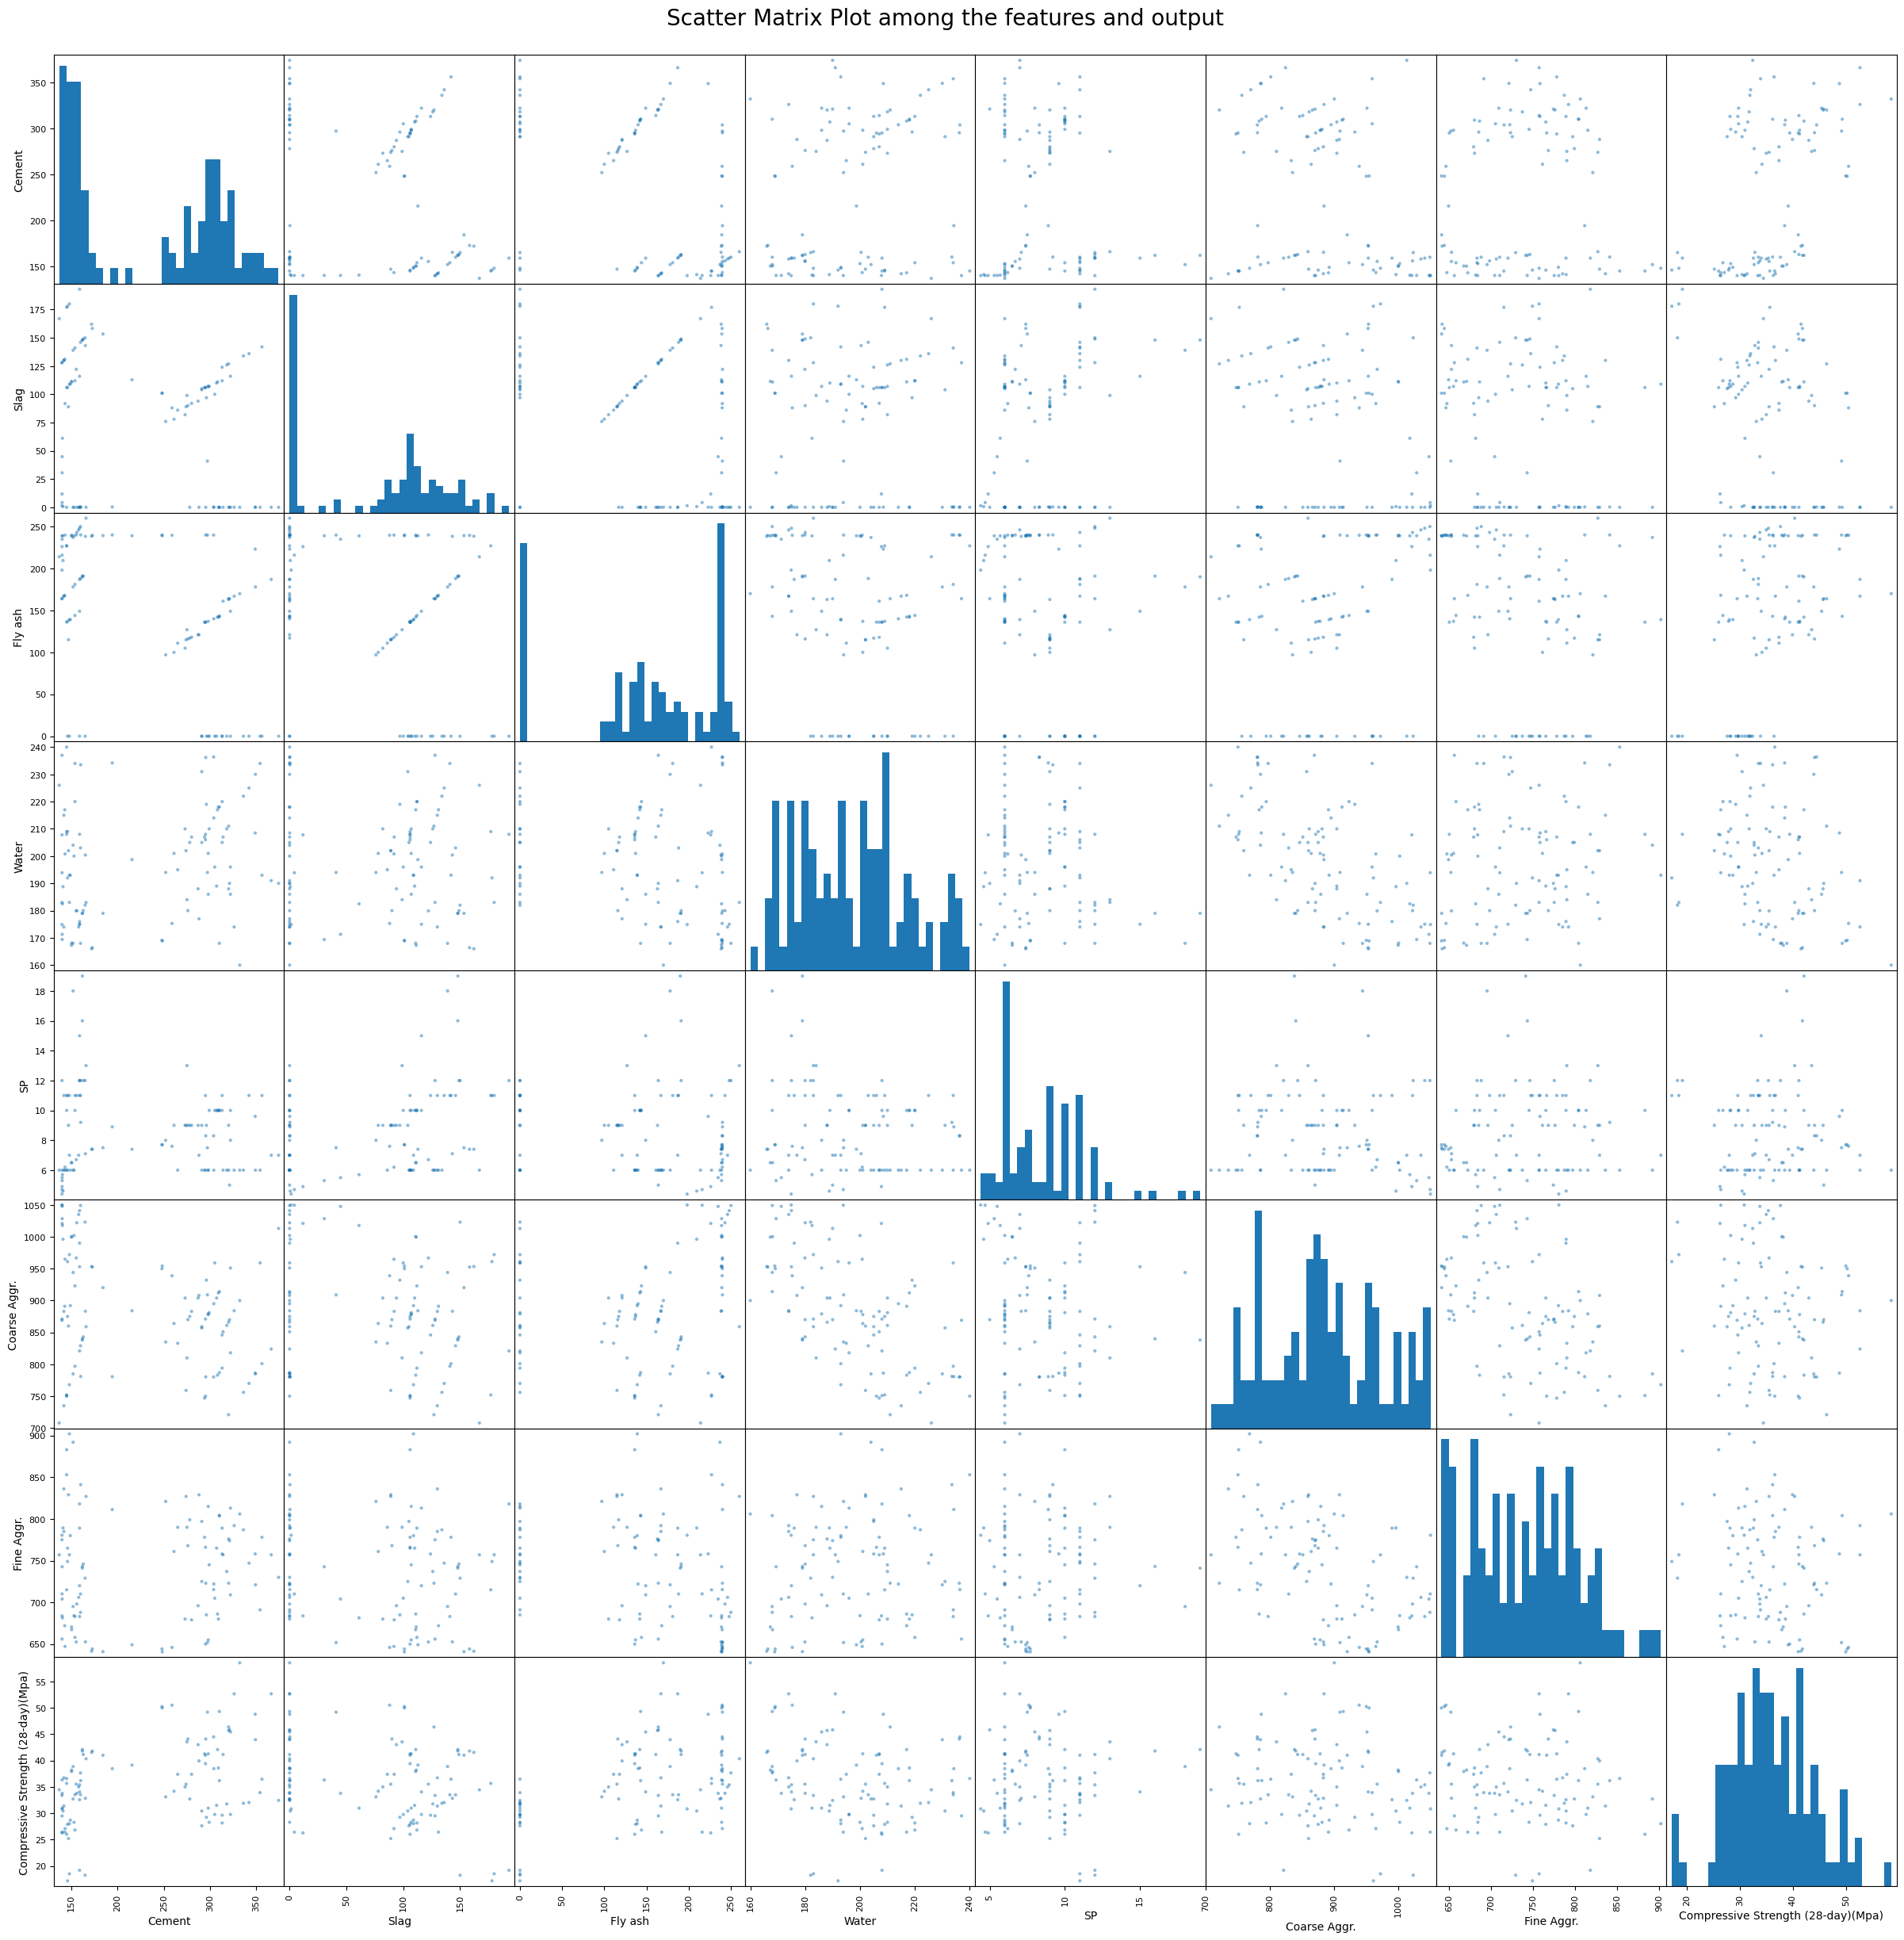

In [48]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

scatter_matrix_plot = scatter_matrix(slump_data, figsize=(30, 30), diagonal='hist', hist_kwds={'bins': 30})
plt.suptitle("Scatter Matrix Plot among the features and output", y=0.9, fontsize=20)
plt.show()

The dataset does not exhibit a clear distribution, and it is not immediately apparent whether there are any correlations among the features. To investigate this further, I will create a correlation matrix and analyze any potential linear relationships among the features.

### Finding Correlation among features and outputs

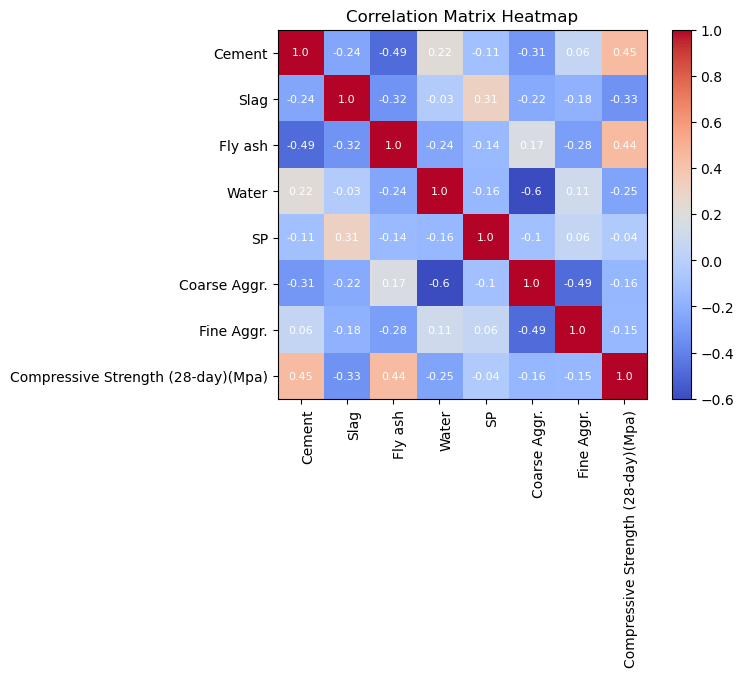

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# create a sample dataframe


# calculate the correlation matrix
corr_matrix = slump_data.corr()

# create the heatmap plot

fig, ax = plt.subplots()
im = ax.imshow(corr_matrix, cmap='coolwarm')

# add a colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# set the axis labels
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)

# rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

# add the correlation coefficients in each cell of the heatmap
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = ax.text(j, i, round(corr_matrix.iloc[i, j], 2), ha="center", va="center", color="w", fontsize=8)

# set the title
ax.set_title("Correlation Matrix Heatmap")

# show the plot
plt.show()


While the correlation matrix heatmap indicates that there are some correlations among the features and the output, none of these correlations are particularly strong. Additionally, upon inspecting scatterplots of the data, it seems that there is not a significant amount of correlation among the features.

In [50]:
y = slump_data['Compressive Strength (28-day)(Mpa)']
y.head()

0    34.99
1    41.14
2    41.81
3    42.08
4    26.82
Name: Compressive Strength (28-day)(Mpa), dtype: float64

In [51]:
X = slump_data[['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.', 'Fine Aggr.']]
X.head()

Cement   Slag  Fly ash  Water    SP  Coarse Aggr.  Fine Aggr.
0   273.0   82.0    105.0  210.0   9.0         904.0       680.0
1   163.0  149.0    191.0  180.0  12.0         843.0       746.0
2   162.0  148.0    191.0  179.0  16.0         840.0       743.0
3   162.0  148.0    190.0  179.0  19.0         838.0       741.0
4   154.0  112.0    144.0  220.0  10.0         923.0       658.0

Because the features in the dataset have different units of measurement, it is important to scale the data to ensure that all features are weighted equally when training a regression model. One common scaling technique is standard scaling, which involves transforming the data to have a mean of 0 and a standard deviation of 1. 

Therefore, we will apply standard scaling to the dataset using a scaler from scikit-learn's preprocessing module. This will transform the data so that each feature has a similar range of values, making it easier to train a regression model that can effectively learn from the data.

#### Scaling and Splitting of Data

In [52]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Traning Models

In [54]:
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression, SGDRegressor

svm_regressor = LinearSVR(random_state=42)
svm_regressor.fit(X_train, y_train)

lr_regressor = LinearRegression()
lr_regressor.fit(X_train, y_train)

sgd_regressor = SGDRegressor(random_state=42)
sgd_regressor.fit(X_train, y_train)

SGDRegressor(random_state=42)

In [55]:
from sklearn.ensemble import VotingRegressor

voting_regressor = VotingRegressor([('svm', svm_regressor), ('lr', lr_regressor), ('sgd', sgd_regressor)])
voting_regressor.fit(X_train, y_train)

VotingRegressor(estimators=[('svm', LinearSVR(random_state=42)),
                            ('lr', LinearRegression()),
                            ('sgd', SGDRegressor(random_state=42))])

#### Predictions of models

In [56]:
svm_pred = svm_regressor.predict(X_test)
lr_pred = lr_regressor.predict(X_test)
sgd_pred = sgd_regressor.predict(X_test)
voting_pred = voting_regressor.predict(X_test)

#### Performance of models

In [57]:
from sklearn.metrics import mean_squared_error

svm_rmse = np.sqrt(mean_squared_error(y_test, svm_pred))
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
sgd_rmse = np.sqrt(mean_squared_error(y_test, sgd_pred))
voting_rmse = np.sqrt(mean_squared_error(y_test, voting_pred))

print('SVM RMSE:', round(svm_rmse,3))
print('Linear Regression RMSE:', round(lr_rmse, 3))
print('SGD Regressor RMSE:', round(sgd_rmse, 3))
print('Voting Regressor RMSE:', round(voting_rmse, 3))

SVM RMSE: 2.522
Linear Regression RMSE: 2.069
SGD Regressor RMSE: 2.057
Voting Regressor RMSE: 1.986


The root mean squared error (RMSE) is a measure of the difference between the actual and predicted values of a regression problem. The lower the RMSE, the better the performance of the model.

Based on the given RMSE values, we can analyze the performance of each model as follows:

**1. SVM RMSE: 2.522**
    - This model has the highest RMSE among the four models evaluated. It indicates that the SVM model's predicted values are off by an average of 2.522 units from the actual values. This suggests that the SVM model may not be the best fit for the data.
    
    
**2. Linear Regression RMSE: 2.069**
    - This model has a lower RMSE compared to the SVM model. This suggests that the linear regression model may be a better fit for the data compared to the SVM model.
    
    
**3. SGD Regressor RMSE: 2.057**
    - This model has a slightly lower RMSE than the linear regression model. It suggests that the stochastic gradient descent regressor model is a good fit for the data, and it may perform better than the linear regression model.
    
    
**4. Voting Regressor RMSE: 1.986**
    - The Voting Regressor is an ensemble model that combines the predictions of multiple individual regression models, including SVM, linear regression, and stochastic gradient descent regressor. The ensemble model combines the strengths of each individual model, resulting in better performance compared to the individual models alone. The lower RMSE of the Voting Regressor (1.986) compared to the other individual models indicates that the ensemble model was able to capture the patterns and trends in the data more accurately. By combining the predictions of different models, the ensemble model is able to reduce the variance and improve the stability of the predictions, resulting in a more accurate overall prediction. 
    
The superior performance of the Voting Regressor compared to the individual models can be attributed to the combination of different models and their respective strengths, which results in a more accurate prediction of the target variable. the Voting Regressor is performing hard voting, which means it combines the predictions of the individual models by taking the majority vote of the predicted values. In other words, the final prediction of the ensemble model is determined by a simple majority vote among the individual models. The hard voting approach works by assigning equal weights to all of the individual models and combining their predictions using a simple voting mechanism. The idea is that if the individual models are diverse enough, they will make different types of errors, and the ensemble model will be able to correct those errors by taking the majority vote. For example, if the SVM model predicts a value that is too high, and the linear regression model predicts a value that is too low, the ensemble model can correct the error by taking the majority vote, which would likely be closer to the true value. This is because the errors of the individual models tend to cancel each other out when combined, resulting in a more accurate overall prediction.

Therefore, the hard voting approach used by the Voting Regressor can be an effective way to combine the predictions of multiple models and improve the accuracy of the final prediction.

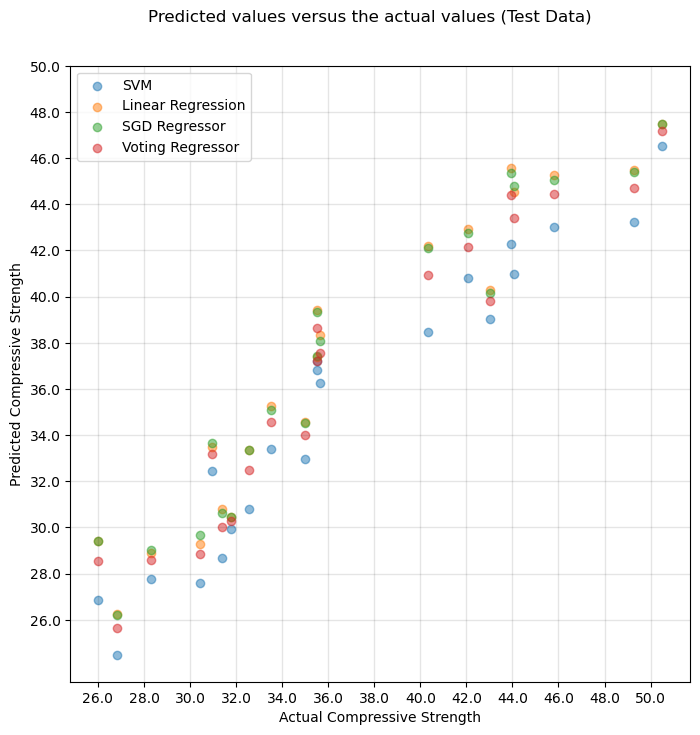

In [58]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

plt.xlabel('Actual Compressive Strength')
plt.ylabel('Predicted Compressive Strength')

# Plot ground truth values vs predicted values for SVM regressor
ax.scatter(y_test, svm_pred, label='SVM', alpha=0.5)

# Plot ground truth values vs predicted values for Linear Regression
ax.scatter(y_test, lr_pred, label='Linear Regression', alpha=0.5)

# Plot ground truth values vs predicted values for SGD Regressor
ax.scatter(y_test, sgd_pred, label='SGD Regressor', alpha=0.5)

# Plot ground truth values vs predicted values for Voting Regressor
ax.scatter(y_test, voting_pred, label='Voting Regressor', alpha=0.5)

grid_size = 2
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1, alpha=0.1, zorder=0)
x_ticks = np.arange(np.round(y_test.min(), 0), y_test.max(), grid_size)
y_ticks = np.arange(np.round(y_test.min(), 0), y_test.max(), grid_size)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_xticklabels(x_ticks)
ax.set_yticklabels(y_ticks)

plt.suptitle("Predicted values versus the actual values (Test Data)", y=0.95)

plt.legend()
plt.show()

The SVM, linear and SGD regressors have scattered predicted values, which indicates that they are not very strong learners. However, the predicted value from the Voting regressor falls between the highest and lowest predicted values from the other regressors. This is because the Voting regressor combines the predictions of multiple weak learners and uses their collective output to make a more accurate prediction. By taking into account the various errors made by the weak learners, the Voting regressor cancels out these errors and tries to predict the closest possible value.

### Finding optimal hyperparameters for models

Since the number of training instances are comparatively low, we will get a warning that the model is unable to converge. We will supress the warning for now. 

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error

# Define the parameter grids for each estimator
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
}

lr_param_grid ={
    'fit_intercept': [True, False],
    'positive': [True, False]
}

sgd_param_grid = {
    'loss': ['squared_error', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

# Create the base estimators with default hyperparameters
svm = LinearSVR(random_state=123)
lr = LinearRegression()
sgd = SGDRegressor(random_state=123)

# Create a GridSearchCV object for each estimator
svm_grid = GridSearchCV(svm, svm_param_grid, cv=3)
lr_grid = GridSearchCV(lr, lr_param_grid, cv=3)
sgd_grid = GridSearchCV(sgd, sgd_param_grid, cv=3)

# # Fit the GridSearchCV objects to the training data
svm_grid.fit(X_train, y_train)
lr_grid.fit(X_train, y_train)
sgd_grid.fit(X_train, y_train)

# Get the best hyperparameters for each estimator
svm_best_params = svm_grid.best_params_
lr_best_params = lr_grid.best_params_
sgd_best_params = sgd_grid.best_params_

#### Tranining models with best hyperparameters

In [60]:
# Train each estimator with the best hyperparameters
svm_tuned = LinearSVR(**svm_best_params, random_state=42)
svm_tuned.fit(X_train, y_train)

lr_tuned = LinearRegression(**lr_best_params)
lr_tuned.fit(X_train, y_train)

sgd_tuned = SGDRegressor(**sgd_best_params, random_state=42)
sgd_tuned.fit(X_train, y_train)

# Train the Voting Regressor with the tuned base estimators
voting_tuned = VotingRegressor([('svm', svm_tuned), ('lr', lr_tuned), ('sgd', sgd_tuned)])
voting_tuned.fit(X_train, y_train)

VotingRegressor(estimators=[('svm',
                             LinearSVR(C=100, epsilon=0.5, random_state=42)),
                            ('lr', LinearRegression()),
                            ('sgd',
                             SGDRegressor(alpha=0.001, learning_rate='adaptive',
                                          penalty='elasticnet',
                                          random_state=42))])

#### Predictions and Performance of tuned models

In [61]:
# Get the predictions for the test set
svm_preds_tuned = svm_tuned.predict(X_test)
lr_preds_tuned = lr_tuned.predict(X_test)
sgd_preds_tuned = sgd_tuned.predict(X_test)
voting_preds_tuned = voting_tuned.predict(X_test)

# Calculate the RMSE for each model
svm_rmse_tuned = mean_squared_error(y_test, svm_preds_tuned, squared=False)
lr_rmse_tuned = mean_squared_error(y_test, lr_preds_tuned, squared=False)
sgd_rmse_tuned = mean_squared_error(y_test, sgd_preds_tuned, squared=False)
voting_rmse_tuned = mean_squared_error(y_test, voting_preds_tuned, squared=False)

# Print the RMSE for each model
print(f"SVM RMSE (tuned): {svm_rmse_tuned:.4f}")
print(f"Linear Regression RMSE (tuned): {lr_rmse_tuned:.4f}")
print(f"SGD Regressor RMSE (tuned): {sgd_rmse_tuned:.4f}")
print(f"Voting Regressor RMSE (tuned): {voting_rmse_tuned:.4f}")

SVM RMSE (tuned): 2.1275
Linear Regression RMSE (tuned): 2.0685
SGD Regressor RMSE (tuned): 2.0595
Voting Regressor RMSE (tuned): 2.0686


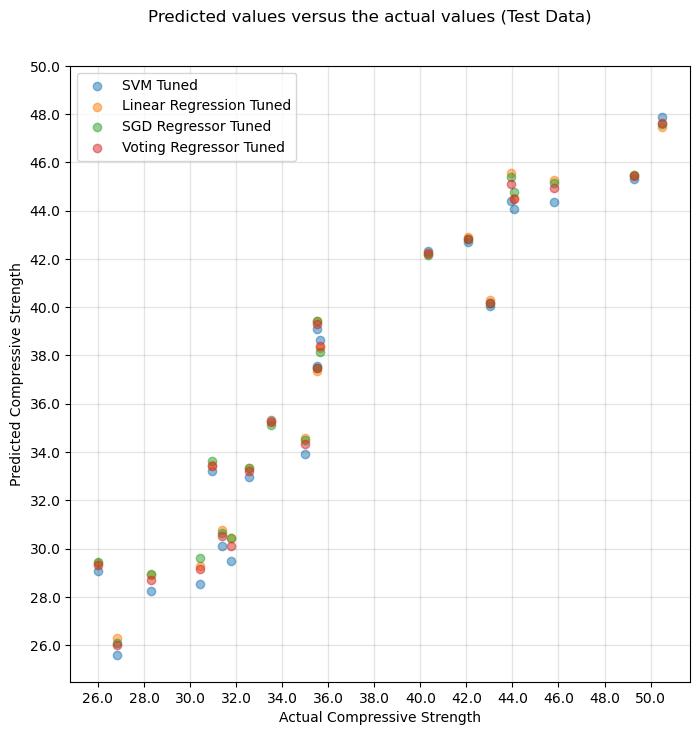

In [62]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

plt.xlabel('Actual Compressive Strength')
plt.ylabel('Predicted Compressive Strength')

# Plot ground truth values vs predicted values for SVM regressor
ax.scatter(y_test, svm_preds_tuned, label='SVM Tuned', alpha=0.5)

# Plot ground truth values vs predicted values for Linear Regression
ax.scatter(y_test, lr_preds_tuned, label='Linear Regression Tuned', alpha=0.5)

# Plot ground truth values vs predicted values for SGD Regressor
ax.scatter(y_test, sgd_preds_tuned, label='SGD Regressor Tuned', alpha=0.5)

# Plot ground truth values vs predicted values for Voting Regressor
ax.scatter(y_test, voting_preds_tuned, label='Voting Regressor Tuned', alpha=0.5)

grid_size = 2
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1, alpha=0.1, zorder=0)
x_ticks = np.arange(np.round(y_test.min(), 0), y_test.max(), grid_size)
y_ticks = np.arange(np.round(y_test.min(), 0), y_test.max(), grid_size)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_xticklabels(x_ticks)
ax.set_yticklabels(y_ticks)

plt.legend()
plt.suptitle("Predicted values versus the actual values (Test Data)", y=0.95)
plt.show()

After individually tuning hyperparameters for each of the base estimators and performing 3-fold cross-validation with Grid-Search to select the best hyperparameters, we obtained the following RMSE values for each model:

- SVM RMSE (tuned): 2.1275
- Linear Regression RMSE (tuned): 2.0685
- SGD Regressor RMSE (tuned): 2.0595
- Voting Regressor RMSE (tuned): 2.0686

RMSE values for each model improved slightly compared to the original models. Among the tuned models, the SGD Regressor performed the best with the lowest RMSE value. However, the difference in RMSE between the tuned models is not significant. 

Surprisingly, the RMSE for the Voting Regressor increased after tuning the hyperparameters. This could be because the ensemble model is making similar errors to the other models, which would indicate that all models are making wrong predictions. Alternatively, it could be due to overfitting, where the models perform well on the training data but not on the test data. Further adjustments to the hyperparameters or the use of a different method may be necessary to improve the performance of the Voting Regressor.

# Abalone dataset

It has 4177 instances with 8 attributes and a column that describes the age, represented in terms of the number of rings, of the abalones. 



Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict the age of the abalone. We want to create a model that correctly predicts the age of a abalone based on its features.

| Name         | Data Type  | Measurement Unit | Description                                       |
|--------------|------------|------------------|---------------------------------------------------|
| Sex          | nominal    | --               | M, F, and I (infant)                              |
| Length       | continuous | mm               | Longest shell measurement                         |
| Diameter     | continuous | mm               | Perpendicular to length                           |
| Height       | continuous | mm               | With meat in shell                                 |
| Whole weight | continuous | grams            | Whole abalone weight                              |
| Shucked weight | continuous | grams          | Weight of meat                                     |
| Viscera weight | continuous | grams          | Gut weight (after bleeding)                        |
| Shell weight | continuous | grams            | Shell weight (after being dried)                   |
| Rings        | integer    | --               | +1.5 gives the age in years                        |



In [63]:
import pandas as pd
import numpy as np
# from sklearn.model_selection import train_test_split

# read in the csv file
abalone_df = pd.read_csv('abalone.data', header=None)

column_names = ["sex", "length", "diameter", "height", "whole_weight", "shucked_weight",
                "viscera_weight", "shell_weight", "rings"]

# add column names to the dataframe
abalone_df.columns = column_names

In [64]:
abalone_df.head()

sex  length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell_weight  rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [65]:
# check for missing values
print(abalone_df.isnull().sum())

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64


The above table shows that there is no missing data in our dataset.

### Visualization of the Abalone Dataset

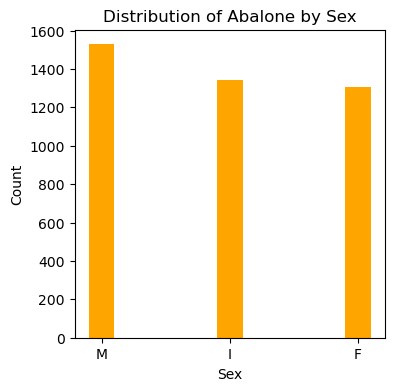

M    1528
I    1342
F    1307
Name: sex, dtype: int64

In [66]:
import matplotlib.pyplot as plt

# Create data
count_by_sex = abalone_df['sex'].value_counts()

# Create horizontal bar plot with adjusted size
fig, ax = plt.subplots(figsize=(4, 4))
ax.bar(count_by_sex.index, count_by_sex.values, color='orange', width=0.2)

# Set axis labels and title
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.set_title('Distribution of Abalone by Sex')

plt.show()

count_by_sex

The above distribution shows that the number of males `M` in dataset is more than infants `I` and females `F`. However, the number of `I` and `F` are almost the same


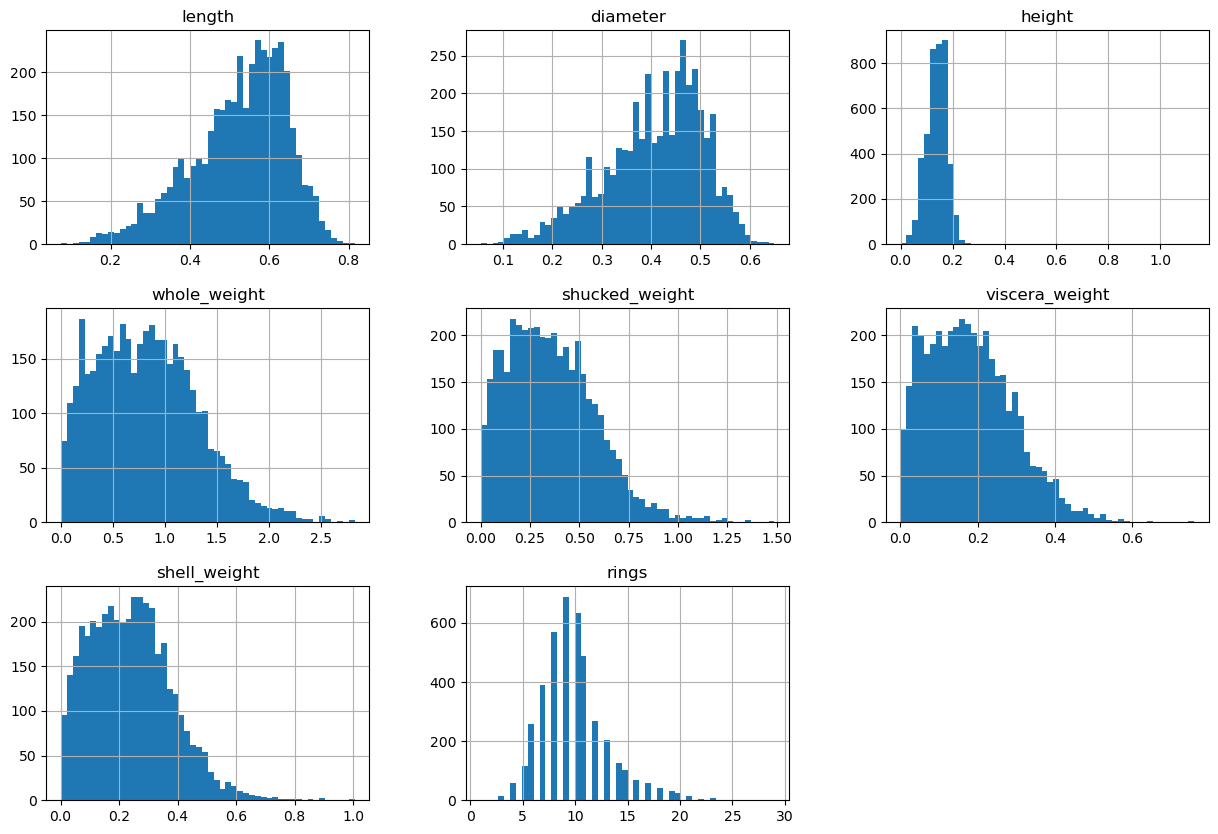

In [67]:
abalone_df.hist(bins=50, figsize=(15,10))
plt.show()

The distribution of data by length and diameter is left skewed whereas the distribution of data by `whole weight`, `shucked weight`, `viscera weight` and `shell weight` is right skewed. The distribution of data by `rings` seems to be categorical. The analysis of the Abalone dataset indicates that the distribution of the length and diameter features is skewed to the left, while the distribution of the whole weight, shucked weight, viscera weight, and shell weight features is skewed to the right. Furthermore, the rings feature appears to be categorical in nature. These observations suggest that the data may not follow a normal distribution and may require transformation or alternative approaches to address this non-normality in statistical analysis.

As `sex` is a categorical variable in textual format. However, assigning numerical values such as 0, 1, and 3 may lead to biased results. Therefore, one-hot encoding is performed to represent the variable numerically.

In [68]:
# convert sex column into numerical values using one-hot encoding
abalone_df = pd.get_dummies(abalone_df, columns=["sex"])

In [69]:
abalone_df.head()

length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell_weight  rings  sex_F  sex_I  sex_M  
0         0.150     15      0      0      1  
1         0.070      7      0      0      1  
2         0.210      9      1      0      0  
3         0.155     10      0      0      1  
4         0.055      7      0      1      0

In [70]:
num_columns =  [col for col in list(abalone_df.columns) if col not in ('sex_F', 'sex_I', 'sex_M')]

# item_list = [e for e in item_list if e not in ('item', 5)]
num_columns

['length',
 'diameter',
 'height',
 'whole_weight',
 'shucked_weight',
 'viscera_weight',
 'shell_weight',
 'rings']

Number of outliers for length: 49
Number of outliers for diameter: 59
Number of outliers for height: 29
Number of outliers for whole_weight: 30
Number of outliers for shucked_weight: 48
Number of outliers for viscera_weight: 26
Number of outliers for shell_weight: 35
Number of outliers for rings: 278


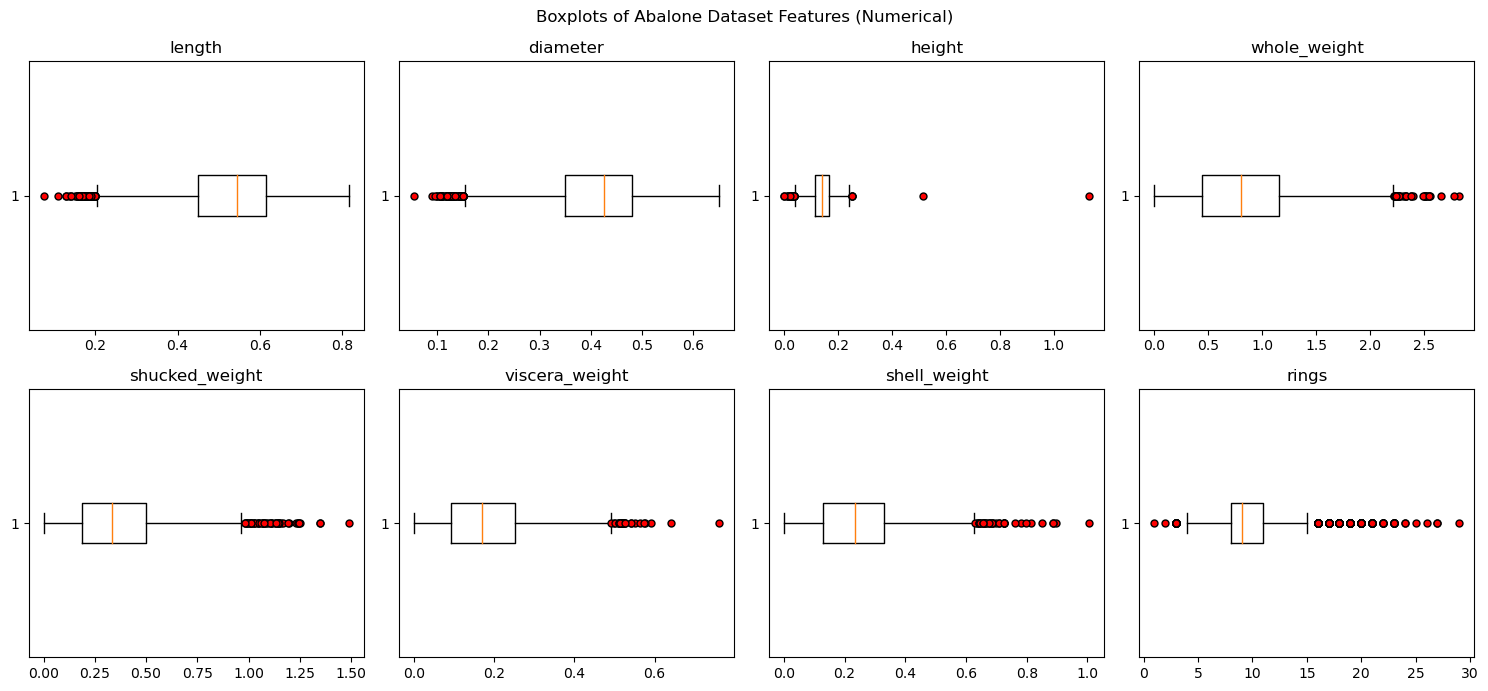

In [71]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 7))

for i, feature in enumerate(num_columns):
    row = i // 4
    col = i % 4
        
    bp = axs[row, col].boxplot(abalone_df[feature], vert=False, 
                               flierprops=dict(marker='o', markersize=5, linestyle='none', linewidth=0.05, markerfacecolor='red'))
    axs[row, col].set_title(feature)
    outliers = [flier.get_xdata() for flier in bp["fliers"]]
    num_outliers = len(outliers[0])
    print(f"Number of outliers for {feature}: {num_outliers}")


fig.suptitle('Boxplots of Abalone Dataset Features (Numerical)')
plt.tight_layout()
plt.show()

The dataset contains a significant number of outliers for each feature, as seen by the number of values that fall outside the interquartile range. However, given that the dataset is relatively small, removing these outliers could result in a significant loss of data. Additionally, the abalone dataset has a limited number of samples and removing data points may further reduce the size of the dataset, which is already relatively small. Therefore, we have decided not to remove the outliers in this case, but we will keep this in mind during our data cleaning process.

#### Splitting dataset

In [72]:
from sklearn.model_selection import train_test_split


# split into train and test sets
X = abalone_df.drop('rings', axis=1)
y = abalone_df['rings']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [73]:
print(f"Training set (X_train, y_train) -> {len(X_train)}")
print(f"Test set (X_test, y_test) -> {len(X_test)}")

Training set (X_train, y_train) -> 3550
Test set (X_test, y_test) -> 627


Splitting the data into 85/15 random split to form a training set and a test set such that we have 3550 instances of training set and 627 of test dataset

from pandas.plotting import scatter_matrix

scatter_matrix_plot = scatter_matrix(X, figsize=(30, 30), diagonal='hist', hist_kwds={'bins': 30})
plt.suptitle("Scatter Matrix Plot among different features in Abalone dataset", y=0.9, fontsize=20)
plt.show()

#### Correlations among data

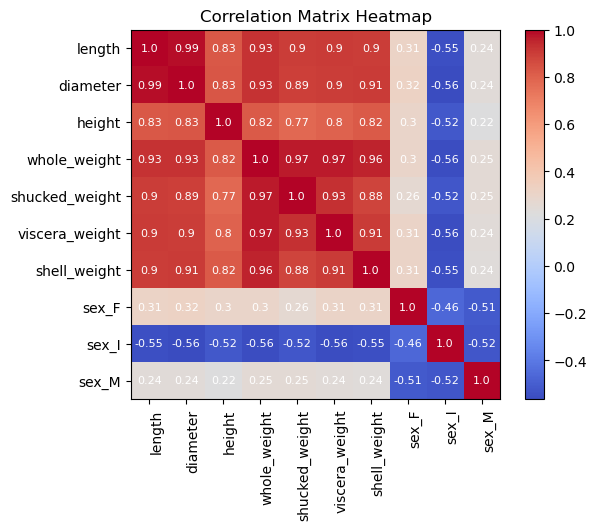

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# calculate the correlation matrix
corr_matrix = X.corr()

# create the heatmap plot

fig, ax = plt.subplots()
im = ax.imshow(corr_matrix, cmap='coolwarm')

# add a colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# set the axis labels
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)

# rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

# add the correlation coefficients in each cell of the heatmap
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = ax.text(j, i, round(corr_matrix.iloc[i, j], 2), ha="center", va="center", color="w", fontsize=8)

# set the title
ax.set_title("Correlation Matrix Heatmap")

# show the plot
plt.show()


The scatter plot and the correlation matrix illustrate that most of the features are strongly correlated with each other, which is not surprising. For instance, the length of the abalone shell tends to be positively associated with the height of the shell. Similarly, the weight of the abalone as a whole, as well as its different components (i.e., viscera, shell, and shucked weight), and the diameter of the shell also tend to increase with the increase in length and height of the abalone shell.

**Key Take away from scatter plot**
1. The scatter plot suggests that there exists a linear correlation between the length, height, and diameter.
2. There is non-linear relationship between the length and the various factors including whole weight, viscera weight, shell weight, and viscera weight. This implies that the relationship between the length and these factors can be represented by a polynomial function with multiple degrees, allowing for more complex patterns and interactions to be captured.

As we plan to conduct feature importance analysis as part of the data cleaning process, we will retain all the features in the abalone dataset for now and not drop any of them.


#### Training a Decision Tree Regression using a 3-fold cross-validation to tune max depth

In [75]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

parameters = {'max_depth': np.arange(1, 21)}
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg_cv = GridSearchCV(dt_reg, parameters, cv=3)
dt_reg_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])})

In [76]:
dt_reg_cv.best_estimator_

DecisionTreeRegressor(max_depth=4, random_state=42)

In [77]:
print("Best parameters:", dt_reg_cv.best_params_)
print("Best score:", round(dt_reg_cv.best_score_, 3))

Best parameters: {'max_depth': 4}
Best score: 0.453


The best value for max_depth that was found through this process was 4, and the corresponding cross-validation score was 0.453. This means that the model performs best when the maximum depth of the decision tree is 4.

The cross-validation score of 0.453 suggests that the model is not a great fit for the data. A score of 1.0 would indicate a perfect fit, while a score of 0.0 would indicate that the model is no better than making random predictions. The fact that the best score we achieved is 0.453 suggests that the model is not able to capture the underlying patterns in the data very well.

It is worth noting that this analysis was performed with all other hyperparameters set to their default values. It is possible that we could improve the performance of the model by tuning other hyperparameters, or by using a different type of model altogether. However, without further analysis it is difficult to say for sure.

#### Plot of the training scores/errors, cross-validation scores/errors and test scores/errors as a function max depth.

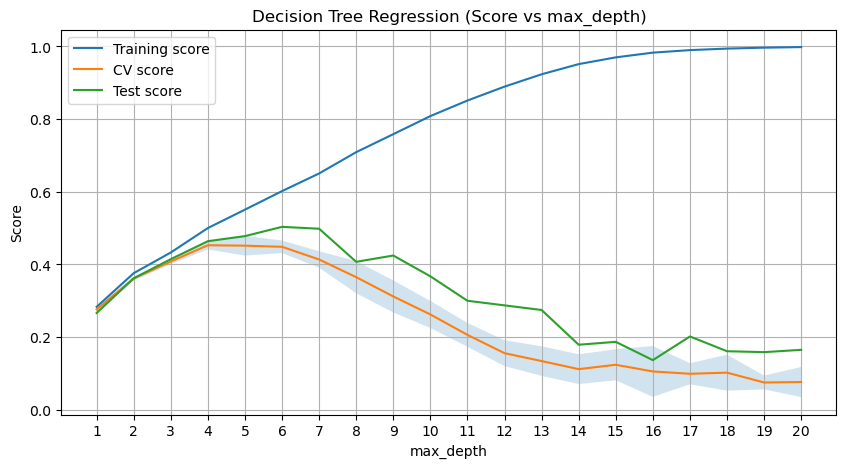

In [78]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

train_scores, test_scores = [], []

cv_scores, cv_std = [], []

for max_depth in parameters['max_depth']:
    tree = DecisionTreeRegressor(random_state=42, max_depth=max_depth)
    tree.fit(X_train, y_train)

    train_scores.append(tree.score(X_train, y_train))
    test_scores.append(tree.score(X_test, y_test))

    scores = cross_val_score(tree, X_train, y_train, cv=3)
    cv_scores.append(scores.mean())
    cv_std.append(scores.std())

plt.figure(figsize=(10, 5))
plt.plot(parameters['max_depth'], train_scores, label='Training score')
plt.plot(parameters['max_depth'], cv_scores, label='CV score')
plt.plot(parameters['max_depth'], test_scores, label='Test score')
plt.fill_between(parameters['max_depth'], np.array(cv_scores) - np.array(cv_std), np.array(cv_scores) + np.array(cv_std), alpha=0.2)
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('Decision Tree Regression (Score vs max_depth)')



# Set xticks at every 0.5 x value
xticks = [i + 1 for i in range(len(parameters['max_depth'] - 1))]
plt.xticks(xticks, [str(d) for d in parameters['max_depth']])

# Add grid lines
plt.grid(True)
plt.show()


The `score()` method in the Decision Tree Regression model returns the coefficient of determination $R^2$, which is a measure of the proportion of variance in the dependent variable that can be explained by the independent variables in the model. A higher $R^2$ value indicates a better fit between the model and the data.

In the plot above, we can observe that the training score increases as the `max_depth` increases, indicating that the model is overfitting the data. However, the cross-validation score increases until a `max_depth` of 4 and then starts to decrease, indicating that the model's generalization performance starts to degrade after `max_depth=4`. The shade of blue color represents the variance of cross-validation scores. Therefore, we can choose a `max_depth of 4` as the optimal parameter, as this would help prevent overfitting and achieve good generalization performance. 

However, when we tested the model on the test data, we found that the model performed best with a `max_depth` of 6. This indicates that the model may be able to capture some additional complexity in the test data with a slightly higher `max_depth` value, although this could also be due to randomness in the test set.
 

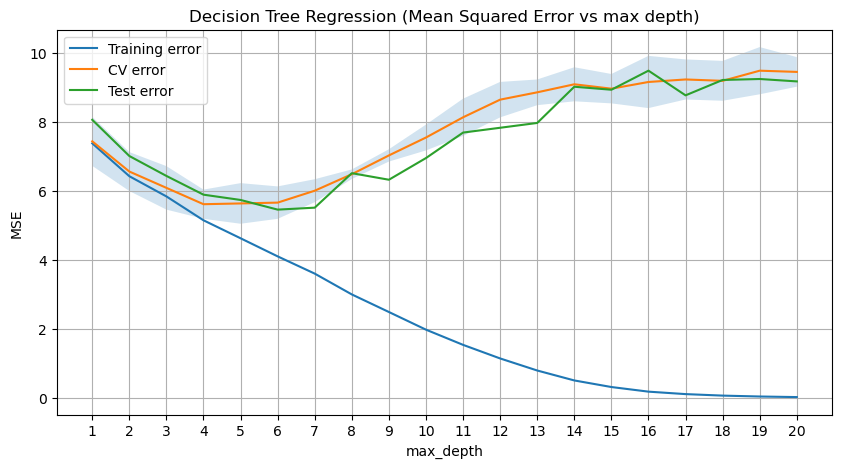

In [79]:
from sklearn.metrics import mean_squared_error

train_errors, test_errors = [], []
cv_errors, cv_std = [], []

for max_depth in parameters['max_depth']:
    tree = DecisionTreeRegressor(random_state=42, max_depth=max_depth)
    tree.fit(X_train, y_train)

    y_train_pred = tree.predict(X_train)
    train_errors.append(mean_squared_error(y_train, y_train_pred))

    y_test_pred = tree.predict(X_test)
    test_errors.append(mean_squared_error(y_test, y_test_pred))

    cv_scores = -cross_val_score(tree, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
    # print(cv_scores)
    cv_errors.append(cv_scores.mean())
    cv_std.append(cv_scores.std())

plt.figure(figsize=(10, 5))
plt.plot(parameters['max_depth'], train_errors, label='Training error')
plt.plot(parameters['max_depth'], cv_errors, label='CV error')
plt.plot(parameters['max_depth'], test_errors, label='Test error')
plt.fill_between(parameters['max_depth'], np.array(cv_errors) - np.array(cv_std), np.array(cv_errors) + np.array(cv_std), alpha=0.2)
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.title('Decision Tree Regression (Mean Squared Error vs max depth)')


xticks = [i + 1 for i in range(len(parameters['max_depth'] - 1))]
plt.xticks(xticks, [str(d) for d in parameters['max_depth']])

plt.grid(True)
plt.show()


In the plot of `Mean Squared Error (MSE) vs max_depth`, we observe that the training error decreases as the max_depth increases, indicating that the model is overfitting the data. However, the cross-validation error initially decreases until `max_depth=4` and then starts to increase, indicating that the model's generalization performance starts to degrade after this point.

When we test the model on the independent test dataset, we found that the model achieved the `lowest MSE value` when `max_depth` is set to 6. However, it is important to note that this result may be influenced by the random nature of the test data or the specific characteristics of the test set. Therefore, we cannot conclusively determine whether the model is fitting additional complexity beyond a `max_depth` of 4, or whether the observed performance is simply a result of randomness in the data.

#### Train a Decision Tree Regression using a 3-fold cross-validation to tune min samples leaf

In [80]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

parameters = {'min_samples_leaf': np.arange(1, 100)}
dt_reg = DecisionTreeRegressor(random_state=42, max_depth=4)
dt_reg_cv = GridSearchCV(dt_reg, parameters, cv=3)
dt_reg_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=DecisionTreeRegressor(max_depth=4, random_state=42),
             param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [81]:
dt_reg_cv.best_params_

{'min_samples_leaf': 45}

#### Plot of the training errors, cross-validation errors and test errors as a function min samples leaf.

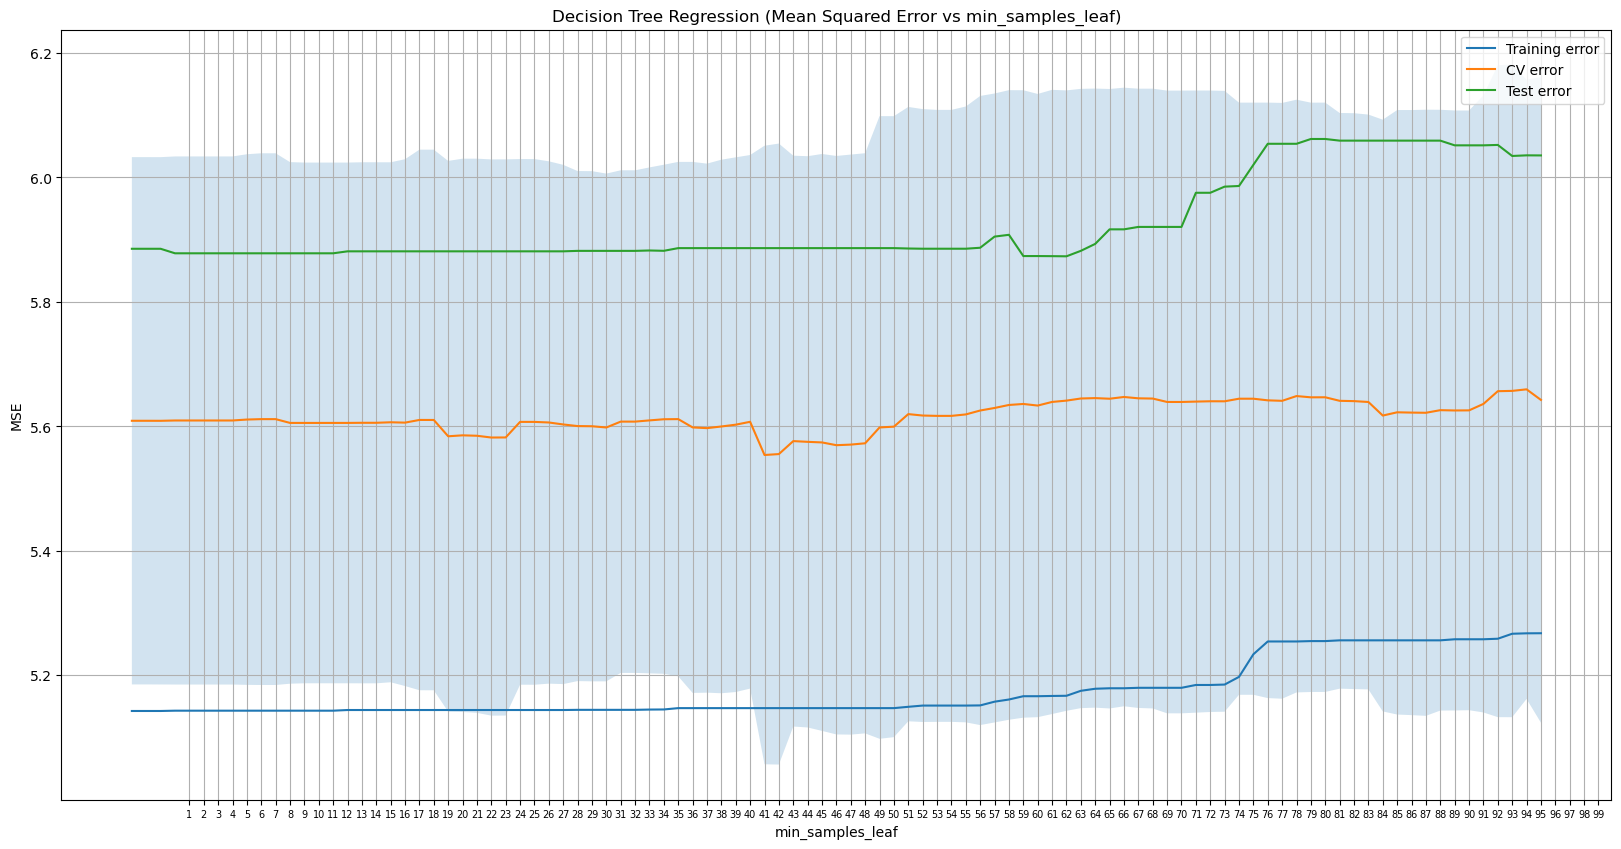

In [82]:
train_errors, test_errors = [], []
cv_errors, cv_std = [], []

for leaf in parameters['min_samples_leaf']:
    tree = DecisionTreeRegressor(random_state=42, max_depth=4, min_samples_leaf=leaf)
    tree.fit(X_train, y_train)

    y_train_pred = tree.predict(X_train)
    train_errors.append(mean_squared_error(y_train, y_train_pred))

    y_test_pred = tree.predict(X_test)
    test_errors.append(mean_squared_error(y_test, y_test_pred))

    cv_scores = -cross_val_score(tree, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
    # print(cv_scores)
    cv_errors.append(cv_scores.mean())
    cv_std.append(cv_scores.std())

plt.figure(figsize=(20,10))
plt.plot(parameters['min_samples_leaf'], train_errors, label='Training error')
plt.plot(parameters['min_samples_leaf'], cv_errors, label='CV error')
plt.plot(parameters['min_samples_leaf'], test_errors, label='Test error')
plt.fill_between(parameters['min_samples_leaf'], np.array(cv_errors) - np.array(cv_std), np.array(cv_errors) + np.array(cv_std), alpha=0.2)
plt.legend()
plt.xlabel('min_samples_leaf')
plt.ylabel('MSE')
plt.title('Decision Tree Regression (Mean Squared Error vs min_samples_leaf)')


xticks = [i + 5 for i in range(len(parameters['min_samples_leaf'] - 1))]
plt.xticks(xticks, [str(d) for d in parameters['min_samples_leaf']], fontsize=7)

plt.grid(True)
plt.show()




The `GridSearchCV` shows that the optimal value for `min_samples_leaf` is 45. 

From the error plots, we can observe that the regression tree is not much affected by the `min_samples_leaf` when we choose the `max_depth=4`.

We can observe that the training error is the lowest when `min_samples_leaf` is small, which is expected as a more flexible model tends to fit the training data better. However, this can lead to overfitting, where the model is too complex and captures noise in the data. On the other hand, setting a large `min_samples_leaf` can lead to underfitting, where the model is too simple and fails to capture the underlying patterns in the data. 

As we increase the value of `min_samples_leaf`, the error tends to increase for all three sets: training, validation, and test. However, we notice that the validation error is lowest around a `min_samples_leaf` value of 40. Therefore, if we had to choose the optimal value based on the error plots and the `GridSearchCV`, we would select a `min_samples_leaf` of around 45.

#### Random Forest regressor with 500 estimators

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the random forest regressor with 500 estimators
rf_regressor = RandomForestRegressor(n_estimators=500, max_depth=4, min_samples_leaf=45,
                                     max_features='sqrt', n_jobs=-1, bootstrap=True,
                                     random_state=42)



# Fit the regressor to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set and round to the nearest integer
y_pred = np.round(rf_regressor.predict(X_test))

# Calculate the RMSE of the predictions
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Random Forest Regressor RMSE:", round(rmse, 3))


Random Forest Regressor RMSE: 2.437


The Random Forest regressor model was built with 500 decision trees (estimators) using the previously selected values of `max_depth` and `min_samples_leaf`. The model was further fine-tuned by manually experimenting with other hyperparameters: `max_features`, `bootstrap`. After training and testing the model, the RMSE (Root Mean Square Error) for the predictions made by the model was found to be 2.437, which is a measure of the difference between the predicted and actual values. A lower RMSE indicates that the model is better at predicting the target variable.

#### Feature Importances

In [84]:

# Use feature importances to select relevant features
feature_importances = rf_regressor.feature_importances_

for score, feature in zip(feature_importances, X.columns):
    print(f'{feature} -> Feature Score: {round(score, 2)}')
    
print('\n')

selected_features = X_train.columns[feature_importances > 0.05]

# Trim the feature dimension of the data
X_train_reduced = X_train[selected_features]
X_test_reduced = X_test[selected_features]

# Report the retained and removed features
removed_features = X_train.columns[feature_importances <= 0.05]
print("Retained features:", list(selected_features))
print("Removed features:", list(removed_features))

# Calculate the total feature importance value retained after dimension reduction
total_importance = feature_importances[feature_importances > 0.05].sum()
print("Total feature importance value retained:", round(total_importance, 3))


length -> Feature Score: 0.04
diameter -> Feature Score: 0.12
height -> Feature Score: 0.19
whole_weight -> Feature Score: 0.12
shucked_weight -> Feature Score: 0.06
viscera_weight -> Feature Score: 0.1
shell_weight -> Feature Score: 0.35
sex_F -> Feature Score: 0.0
sex_I -> Feature Score: 0.02
sex_M -> Feature Score: 0.0


Retained features: ['diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']
Removed features: ['length', 'sex_F', 'sex_I', 'sex_M']
Total feature importance value retained: 0.934


The features that were retained after the dimension reduction step are: 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight'. The features that were removed are: 'length', 'sex_F', 'sex_I', 'sex_M'.

The total feature importance value that is retained after the dimension reduction step is 0.934. This means that the retained features contribute to 93.4% of the total feature importance value.

In [85]:
X_train_reduced.head()

diameter  height  whole_weight  shucked_weight  viscera_weight  \
1815     0.515   0.185        1.3405          0.5595          0.2930   
1128     0.440   0.155        0.6405          0.3360          0.1765   
790      0.465   0.160        0.8935          0.3145          0.2575   
3154     0.410   0.130        0.5600          0.2375          0.1065   
2647     0.390   0.125        0.5830          0.2940          0.1320   

      shell_weight  
1815        0.4375  
1128        0.2450  
790         0.2630  
3154        0.1750  
2647        0.1605

#### Performance Metrics

In [86]:
# from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Use feature importances to select relevant features
threshold = 0.05


rf_regressor_reduced = RandomForestRegressor(n_estimators=500, max_depth=4, min_samples_leaf=45,
                                     max_features='sqrt', n_jobs=-1, bootstrap=True,
                                     random_state=42)

rf_regressor_reduced.fit(X_train_reduced, y_train)

# Make predictions on reduced test data
y_pred_reduced = rf_regressor_reduced.predict(X_test_reduced)
y_pred_reduced = np.round(y_pred_reduced)  # Round to nearest integer

In [87]:
# Compute RMSE for the two models on the test set
y_pred_rf = rf_regressor.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, np.round(y_pred_rf)))
y_pred_rf_reduced = rf_regressor_reduced.predict(X_test_reduced)
rmse_rf_reduced = np.sqrt(mean_squared_error(y_test, np.round(y_pred_rf_reduced)))
print('Random Forest with all features - RMSE: {:.3f}'.format(rmse_rf))
print('Random Forest with reduced features - RMSE: {:.3f}'.format(rmse_rf_reduced))

Random Forest with all features - RMSE: 2.437
Random Forest with reduced features - RMSE: 2.440


The RMSE (Root Mean Squared Error) for the Random Forest model with all features is 2.437, while the RMSE for the Random Forest model with reduced features is 2.440. 

This means that there is not much difference in the performance of the two models. The model with reduced features performs slightly worse than the model with all features, but the difference in their RMSE values is very small.

However, the advantage of using the reduced feature set is that the model is less complex, which can make it easier to interpret and explain. Additionally, using a reduced feature set can help to prevent overfitting and reduce the computational complexity of the model. 

In many real applications, the feature dimension of the data may be reduced drastically with only a slight increase in the prediction error. We won’t see this in this small dataset as the feature dimension is already quite small. 

In [88]:
# Compute prediction errors and group by ring value
errors_rf = np.abs(np.round(y_pred_rf) - y_test)
errors_rf_reduced = np.abs(np.round(y_pred_rf_reduced) - y_test)
df_errors = pd.DataFrame({'Ring': y_test, 'Error': errors_rf})
df_errors_reduced = pd.DataFrame({'Ring': y_test, 'Error': errors_rf_reduced})
grouped_errors = df_errors.groupby('Ring').mean()
grouped_errors_reduced = df_errors_reduced.groupby('Ring').mean()

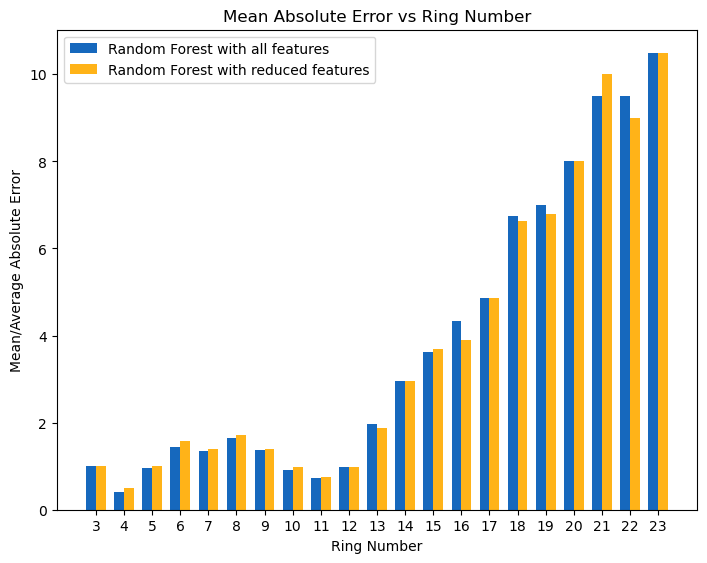

In [89]:
import numpy as np
import matplotlib.pyplot as plt
 
width = 0.35       # the width of the bars
 
# Plotting
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects1 = ax.bar(grouped_errors.index, grouped_errors.Error, width, color='#1668BD')
rects2 = ax.bar(grouped_errors_reduced.index + width, grouped_errors_reduced.Error, width, color='#FFB318')
 
# Add labels, title, and legend
ax.set_ylabel('Mean/Average Absolute Error')
ax.set_xlabel('Ring Number')
ax.set_title('Mean Absolute Error vs Ring Number')
ax.set_xticks(grouped_errors_reduced.index + width / 2)
ax.set_xticklabels(grouped_errors_reduced.index)
ax.legend((rects1[0], rects2[0]), ('Random Forest with all features', 'Random Forest with reduced features'))
 
plt.show()


The above plot shows that our random forest performed porly on the data instances which has large ring value. Also, the predictions from `random forest with all features` and `random forest with reducted features` are almost the same

Here are some possible reasons for that. 

1. Imbalanced data: The distribution of the target variable `rings` is right skewed, which means the number of samples with high target values is relatively small compared to those with low target values. Thus, the random forest is biased towards predicting lower target values, resulting in large errors for the high target values.

2. Outliers: Since the right tail contains the extreme values, the random forest is not be able to capture their influence and thus predict poorly on the right tail.

3. Insufficient training samples: Since, the number of samples in the high target value range is small, the random forest does not have enough information to learn the patterns in that range, leading to poor predictions.

4. Insufficient depth or complexity: Since the depth of the random forest is just 4 which is not  complex enough to capture the complex patterns in the right tail of the distribution.



In [90]:
y_test = y_test.reset_index(drop=True)

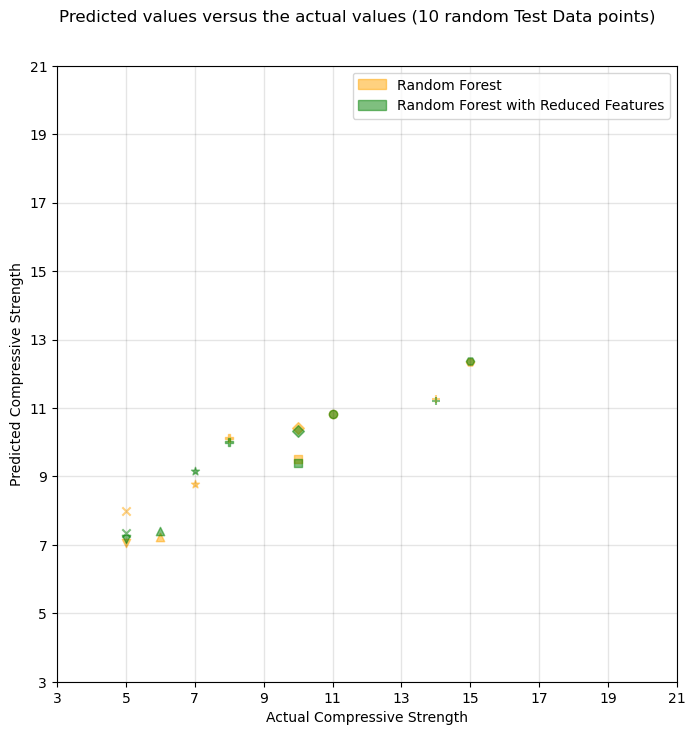

In [91]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a list of 10 random indices
np.random.seed(42)
indices = np.random.choice(len(y_test), size=10, replace=False)

fig, ax = plt.subplots(figsize=(8, 8))

plt.xlabel('Actual Compressive Strength')
plt.ylabel('Predicted Compressive Strength')

markers = ['*', 'o', 'v', '^', 's', 'D', 'x', '+', 'P', 'H', '.', ',', '1', '2', '3']

for i, idx in enumerate(indices):
    ax.scatter(y_test[idx], y_pred_rf[idx], marker=markers[i], alpha=0.5, color='orange', label='Random Forest')
    ax.scatter(y_test[idx], y_pred_rf_reduced[idx], marker=markers[i], alpha=0.5, color='green', label='Random Forest with Reduced Features')

grid_size = 2
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1, alpha=0.1, zorder=0)
x_ticks = np.arange(np.round(y_test.min(), 0), y_test.max(), grid_size)
y_ticks = np.arange(np.round(y_test.min(), 0), y_test.max(), grid_size)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_xticklabels(x_ticks)
ax.set_yticklabels(y_ticks)

class1_patch = mpatches.Patch(color='orange', label='Random Forest', alpha=0.5)
class2_patch = mpatches.Patch(color='green', label='Random Forest with Reduced Features', alpha=0.5)
plt.legend(handles=[class1_patch, class2_patch], loc='best')

plt.suptitle("Predicted values versus the actual values (10 random Test Data points)", y=0.95)
plt.show()

The scatter plot shows the predictions of 10 random Test Data points. The predictions before and after reduced features are almost the same. However, the prediction for large ring value test data points are still off by a huge margin. 


Based on the possible reasons listed above, we can try following improve the performance of the random forest on instances with large ring values:

1. Data balancing: To overcome the issue of imbalanced data, we could try oversampling the instances with high ring values or undersampling the instances with low ring values. This will balance the distribution and may help the random forest learn better.

2. Outlier treatment: Outliers can be treated by either removing them or capping the maximum value. Capping the maximum value at a certain threshold may help prevent the random forest from getting affected by extreme values and may lead to better predictions.

3. Data collection: As the high ring values could be an exception and the data for large ring values may not be enough. In this case, collecting more data for instances with high ring values could help improve the performance of the random forest.

4. Increase depth or complexity: Increasing the depth or complexity of the random forest may help capture the complex patterns in the right tail of the distribution. This could be done by increasing the number of trees, increasing the depth of the trees, or using a different model with more capacity.

5. Use a different model: If random forest is not able to capture the patterns in the data with high ring values, we could try using a different model that is more suited for the problem. 

In addition, considering the goal of the analysis (e.g. predicting age for sales), it may be acceptable to cap the ring value at a certain threshold or focus only on the instances with a certain range of ring values.

### Bagging regressor with 500 SVM regressors

**NOTE: The cell below take few minutes to run**

In [92]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR

# Define the SVM regressor as the base estimator
svm_reg = SVR(kernel='rbf', C=10, gamma=0.1)

# Define the Bagging regressor with 500 SVM regressors as base estimator
svr_bagging = BaggingRegressor(estimator=svm_reg, n_estimators=500, max_features=1.0, bootstrap=True, random_state=42)

# Fit the Bagging regressor on the full-dimensional training set
svr_bagging.fit(X_train, y_train)

# Make predictions on the full-dimensional test set
y_pred_bagging = svr_bagging.predict(X_test)

# Compute the RMSE of the predictions
rmse_bagging = np.sqrt(mean_squared_error(y_test, y_pred_bagging))
print('RMSE of Bagging regressor:', round(rmse_bagging,3))

RMSE of Bagging regressor: 2.239


| Model                            | RMSE  |
|----------------------------------|-------|
| Random Forest with all features  | 2.437 |
| Random Forest with reduced features | 2.440 |
| Bagging Regressor | 2.239 |

The RMSE of the predictions for the test set varies from 2.239 to 2.440 depending on the model used. The Bagging Regressor has the lowest RMSE value of 2.239, indicating that it provides the best predictions compared to the other two models.

#### Predicted ring values versus the ground truth ring values of all the test instances.

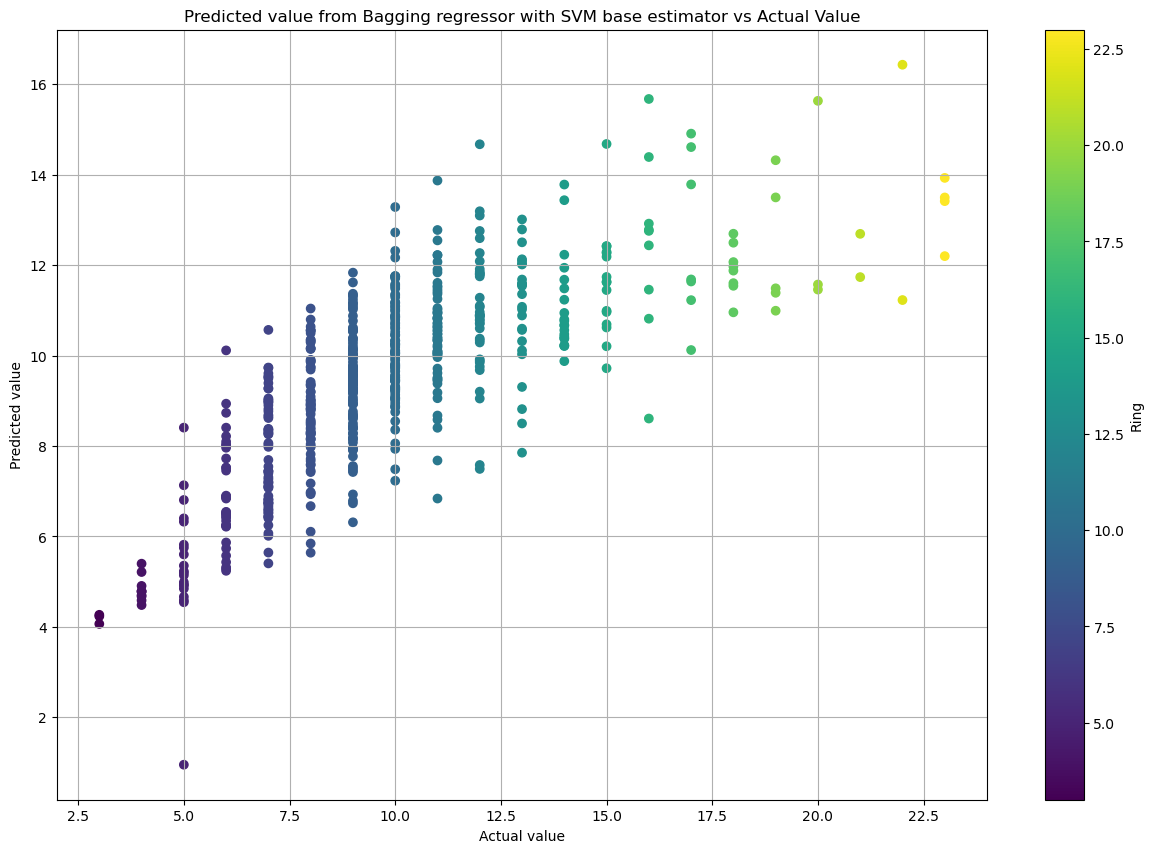

In [93]:
plt.figure(figsize=(15, 10))
plt.scatter(y_test, y_pred_bagging, c=y_test)
plt.colorbar(label='Ring')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Predicted value from Bagging regressor with SVM base estimator vs Actual Value')
plt.grid()
plt.show()

The scatter plot shows a range of predicted values for each actual ring value, indicating that the model's predictions have some variance. However, the model seems to struggle with predicting accurate values for large ring values, which are also underrepresented in the dataset.

#### Comparison of the performance of Random Forest regressors with the Bagging regressor

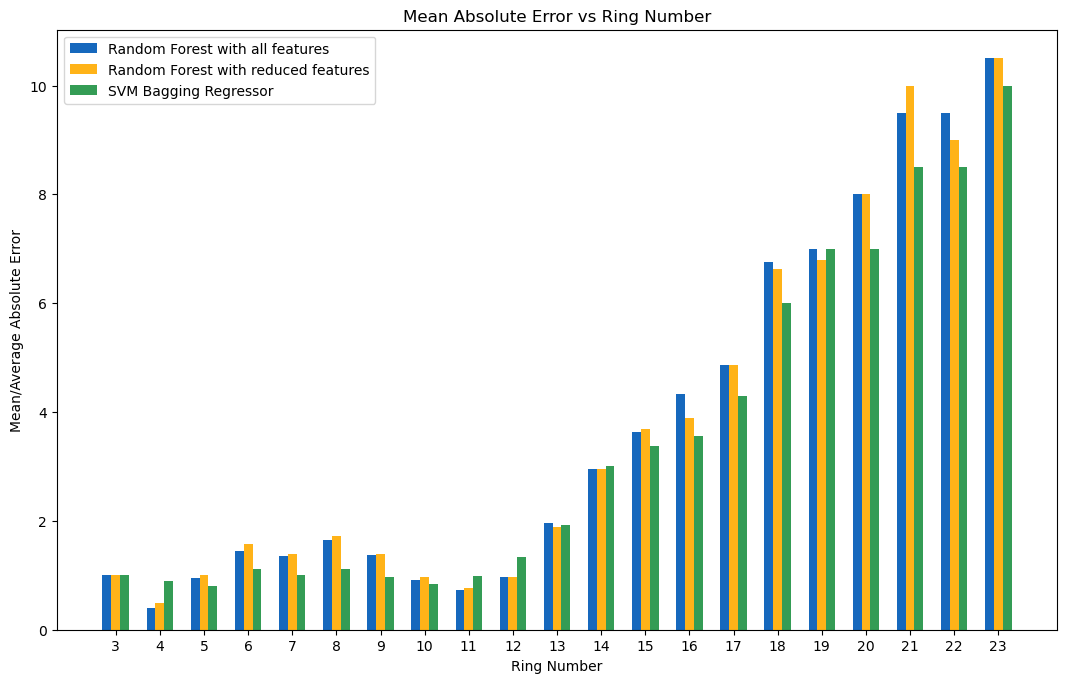

In [94]:
import numpy as np
import matplotlib.pyplot as plt

# Compute prediction errors and group by ring value
errors_rf = np.abs(np.round(y_pred_rf) - y_test)
df_errors_rf = pd.DataFrame({'Ring': y_test, 'Error': errors_rf})
grouped_errors_rf = df_errors_rf.groupby('Ring').mean()

errors_rf_reduced = np.abs(np.round(y_pred_rf_reduced) - y_test)
df_errors_rf_reduced = pd.DataFrame({'Ring': y_test, 'Error': errors_rf_reduced})
grouped_errors_rf_reduced = df_errors_rf_reduced.groupby('Ring').mean()

# Compute prediction errors and group by ring value
errors_rf = np.abs(np.round(y_pred_bagging) - y_test)
df_errors = pd.DataFrame({'Ring': y_test, 'Error': errors_rf})
grouped_errors_bagging = df_errors.groupby('Ring').mean()


width = 0.2       # the width of the bars
x1 = np.arange(len(grouped_errors_rf))
x2 = [x + width for x in x1]
x3 = [x + width for x in x2]

# Plotting
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
rects1 = ax.bar(x1, grouped_errors_rf.Error, width, color='#1668BD')
rects2 = ax.bar(x2, grouped_errors_rf_reduced.Error, width, color='#FFB318')
rects3 = ax.bar(x3, grouped_errors_bagging.Error, width, color='#349C55')

# Add labels, title, and legend
ax.set_ylabel('Mean/Average Absolute Error')
ax.set_xlabel('Ring Number')
ax.set_title('Mean Absolute Error vs Ring Number')
ax.set_xticks(x2)
ax.set_xticklabels(grouped_errors_rf_reduced.index)
ax.legend((rects1[0], rects2[0], rects3[0]), ('Random Forest with all features', 'Random Forest with reduced features', 'SVM Bagging Regressor'))

plt.show()

| Model                            | RMSE  |
|----------------------------------|-------|
| Random Forest with all features  | 2.437 |
| Random Forest with reduced features | 2.440 |
| Bagging Regressor | 2.239 |


The above bar plot shows that SVM bagging regressor fails to perform well on large ring value as well. The error distribution looks similar to that of the above random forest. This might be the result of imbalanced dataset where we have relatively less number of large ring value in training dataset.  However, the RMSE of SVM bagging regressor is less (2.239) compared to that of random forest (Random Forest with all features - RMSE: 2.437 & Random Forest with reduced features - RMSE: 2.440). This shows SVM bagging regressor model has comparatively less error in predictions than random forests.

We can follow the similar resolutions mentioned above for Random forest to improve the performances of the model. 